<a href="https://colab.research.google.com/github/shyamvalsan/image-crop-analysis/blob/main/notebooks/Twitter_Image_Crop_Bias_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing for linguistic bias against non-latin languages in Twitter's image cropping model






1.   Import all necessary libraries




In [1]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

2. Clone git repo and set necessary path variables


In [2]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/shyamvalsan/image-crop-analysis.git
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

     |████████████████████████████████| 1.1 MB 4.9 MB/s 
     |████████████████████████████████| 3.7 MB 36.0 MB/s 
     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 1.8 MB 63.5 MB/s 
     |████████████████████████████████| 357 kB 68.7 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=7efb76efe47cd54b732db140128d20f75c8f2b73336c617905f87c2c3fcd070e
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738995 sha256=4c20b03565a05595eb0074604ac2b3d281138b324969a8cebb2c5d6c396a274a
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319771 sha256=0e224674c466605cffbc9f432c388f528583a8b5850fac9654e3e2c

True

3. Replicate setup steps from Twitter's image-crop-analysis notebook

In [3]:
img_path = next(data_dir.glob("./*.jpg"))
img_path

PosixPath('image-crop-analysis/data/test_string_length_4.jpg')

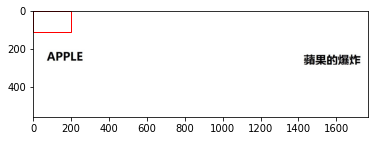

In [4]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [5]:
str(img_path.absolute())

'/content/image-crop-analysis/data/test_string_length_4.jpg'

In [6]:
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"
cmd

"image-crop-analysis/bin/linux/candidate_crops image-crop-analysis/bin/fastgaze.vxm '/content/image-crop-analysis/data/test_string_length_4.jpg' show_all_points"

In [7]:
output = subprocess.check_output(cmd, shell=True)  # Success!
print(output.splitlines())

[b'220 309', b'0 0 1000 560', b'0 0 560 560', b'0 0 491 560', b'80 0 280 560', b'0 0 1767 560', b'44.175 44.175 0.854192', b'132.525 44.175 1.30675', b'220.875 44.175 1.38773', b'309.225 44.175 0.827112', b'397.575 44.175 0.0809295', b'485.925 44.175 -0.226678', b'574.275 44.175 -0.334493', b'662.625 44.175 -0.336548', b'750.975 44.175 -0.336549', b'839.325 44.175 -0.336548', b'927.675 44.175 -0.336549', b'1016.02 44.175 -0.336548', b'1104.38 44.175 -0.334476', b'1192.72 44.175 -0.30691', b'1281.07 44.175 -0.203774', b'1369.42 44.175 0.0333396', b'1457.78 44.175 0.596467', b'1546.12 44.175 1.08213', b'1634.47 44.175 1.1617', b'1722.82 44.175 0.853572', b'44.175 132.525 2.04007', b'132.525 132.525 3.36518', b'220.875 132.525 3.4364', b'309.225 132.525 2.20168', b'397.575 132.525 0.459498', b'485.925 132.525 -0.349724', b'574.275 132.525 -0.579707', b'662.625 132.525 -0.584588', b'750.975 132.525 -0.584589', b'839.325 132.525 -0.584589', b'927.675 132.525 -0.584589', b'1016.02 132.525 -0

In [8]:
! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

showAllPoints=true, argv[3]=show_all_points
220 309
0 0 1000 560
0 0 560 560
0 0 491 560
80 0 280 560
0 0 1767 560
44.175 44.175 0.854192
132.525 44.175 1.30675
220.875 44.175 1.38773
309.225 44.175 0.827112


In [9]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling

In [10]:
parse_output(output).keys()

dict_keys(['salient_point', 'crops', 'all_salient_points'])

In [11]:
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)

In [12]:
plt.matplotlib.__version__

'3.2.2'

4. List the test files we will be using to illustrate linguistic bias in this notebook

In [13]:
list(data_dir.glob("./*.jpg"))

[PosixPath('image-crop-analysis/data/test_string_length_4.jpg'),
 PosixPath('image-crop-analysis/data/real_world_text_2.jpg'),
 PosixPath('image-crop-analysis/data/test_string_length.jpg'),
 PosixPath('image-crop-analysis/data/test_string_length3.jpg'),
 PosixPath('image-crop-analysis/data/test_string_length1.jpg'),
 PosixPath('image-crop-analysis/data/real_world_text_1.jpg')]

Test #1 


*   Real world image (photo taken by author of this notebook)
*   Depicts two shop boards, one of a bank (Vijaya Bank) which is written in Bengali (7th most spoken language in the world with 200 million+ speakers) and another one is for Cox&Kings written in English and partially obstructued by a tree
*   Analysis clearly shows that all salient points are detected on Cox&Kings English text and none for the Bengali boarding.



image-crop-analysis/data/real_world_text_1.jpg
None 755 313


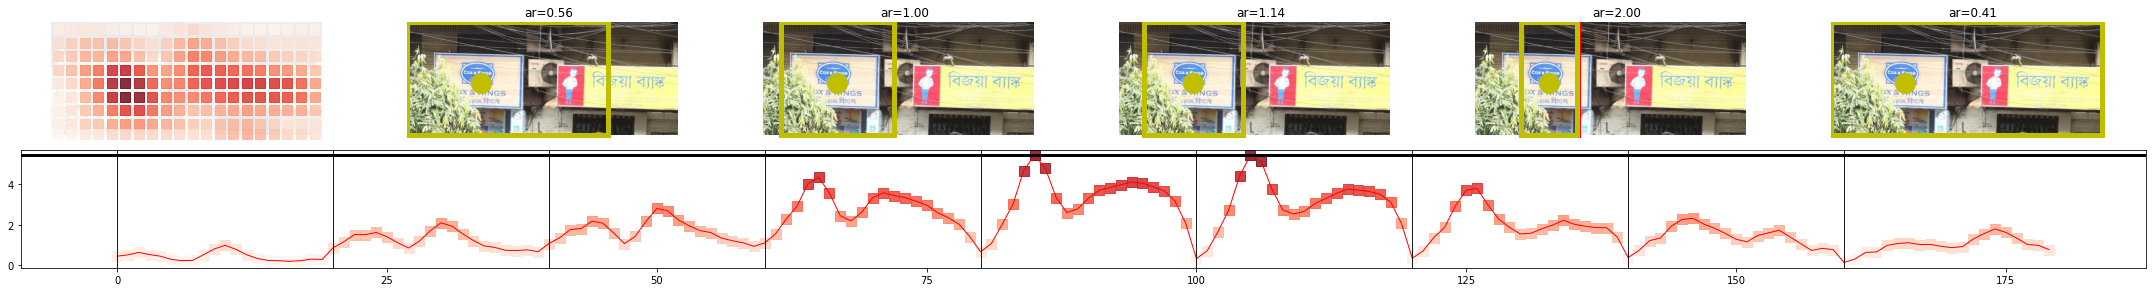

In [17]:
for img_path in data_dir.glob("real_world_text_1.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)

None 755 313


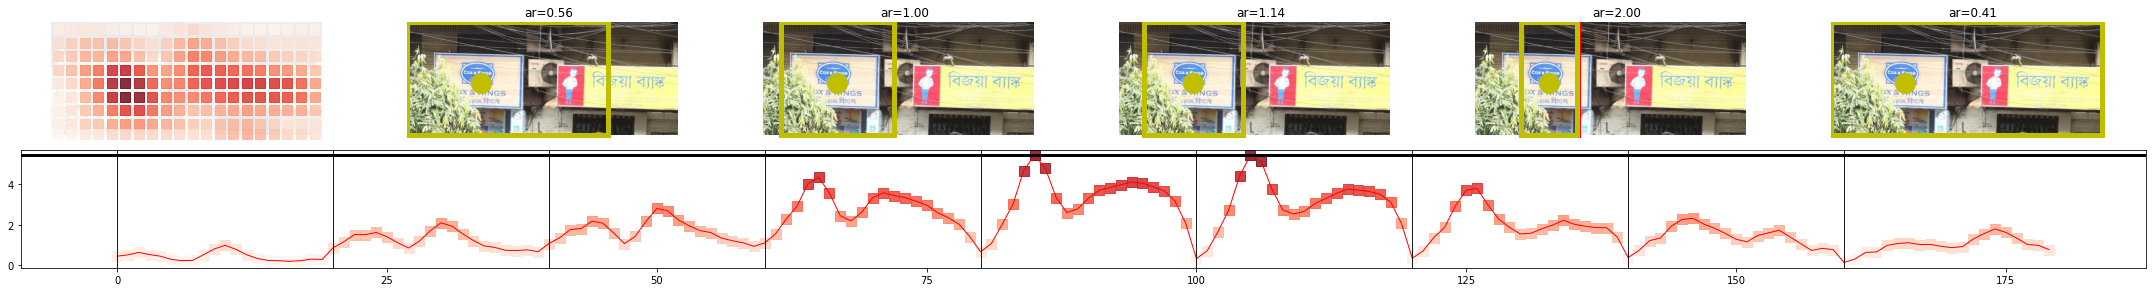

In [18]:
for img_path in reservoir_sampling(data_dir.glob("./real_world_text_1.jpg"), K=5):
    model.plot_img_crops(img_path)

Test #2 


*   Real world image (photo taken by author of this notebook)
*   Depicts billboards and signs in Tokyo, Japan, one is large and written in Japanese (100 million+ speakers), while another one is smaller and contains English text
*   Analysis clearly shows that all salient points are detected on  English text and none for the Japanese text.



image-crop-analysis/data/real_world_text_2.jpg
None 968 302


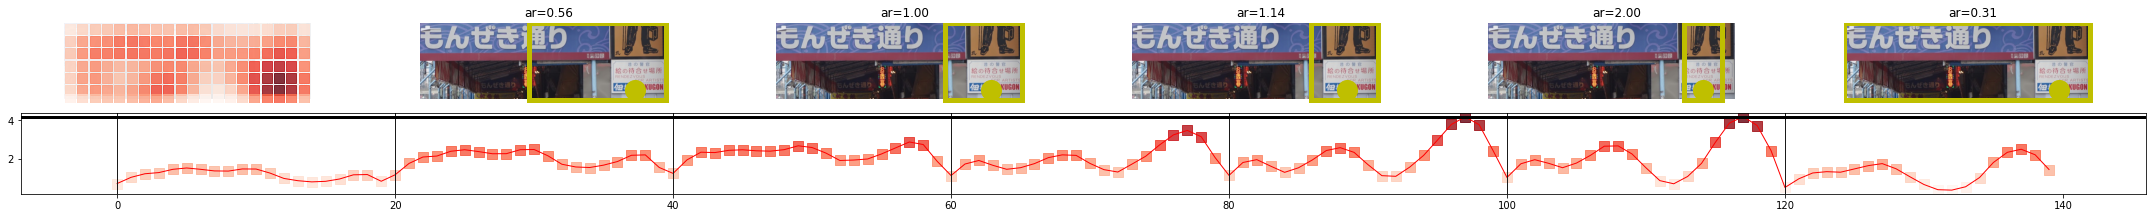

In [20]:
for img_path in data_dir.glob("real_world_text_2.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)

Test #3 


*   Generated image for testing purpose
*   Contains English and Chinese (1.3 billion speakers) text, extra characters ensured in Chinese text to avoid crop due to smaller size
*   Analysis clearly shows that all salient points are detected on  English text and none for the Chinese text.



image-crop-analysis/data/test_string_length.jpg
None 1138 560


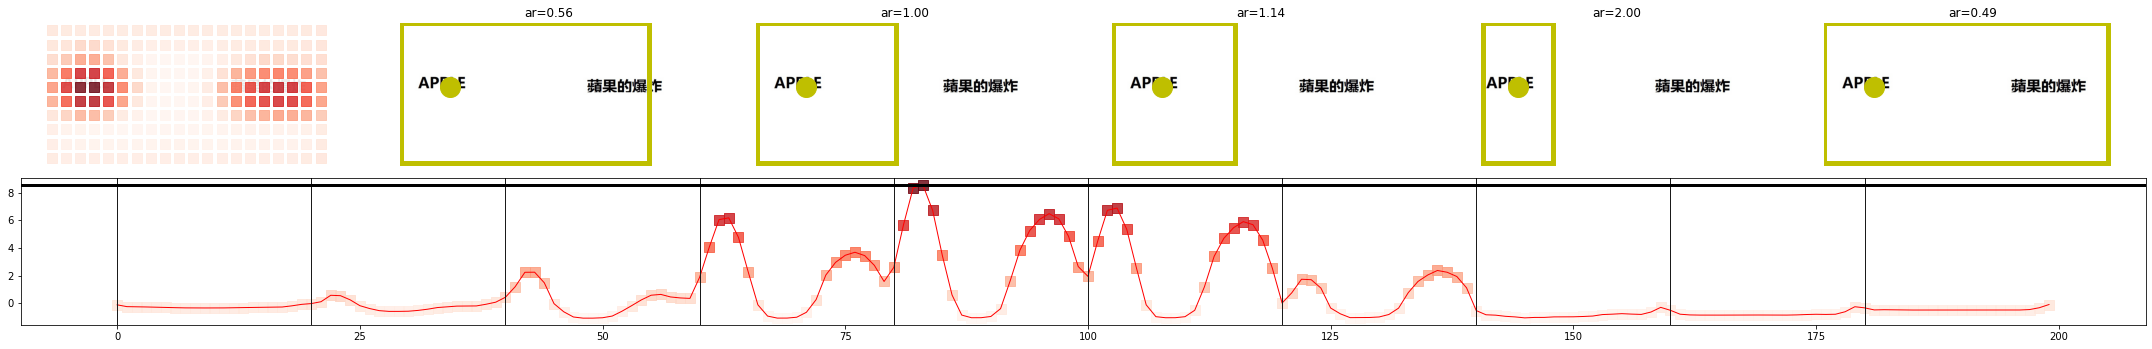

In [21]:
for img_path in data_dir.glob("test_string_length.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)

Test #4

*  Generated image for testing purpose
*  Contains English and Arabic text, extra characters ensured in Chinese text to avoid crop due to smaller size
*  Analysis clearly shows that all salient points are detected on English text and none for the Arabic text.

image-crop-analysis/data/test_string_length1.jpg
None 1138 560


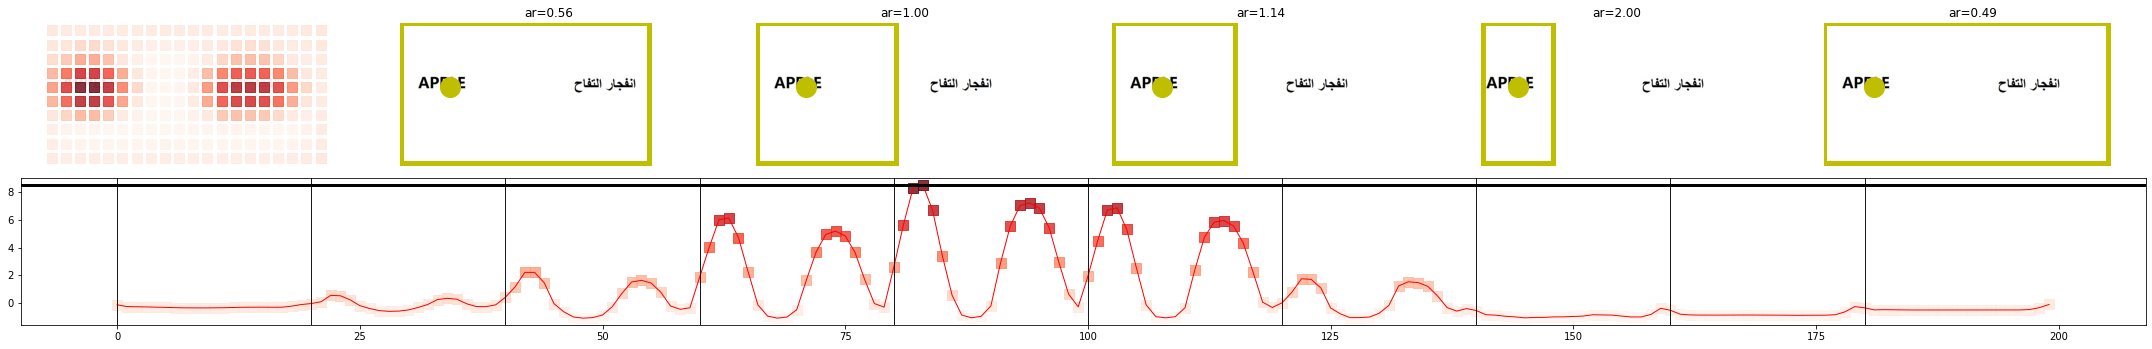

In [22]:
for img_path in data_dir.glob("test_string_length1.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)

Test #5

*  Generated image for testing purpose
*  Contains English and Arabic text
*  Arabic text size has been increased to indicate emphasis
*  Analysis clearly shows that all salient points are detected on English text and none for the Arabic text despite emphasis (through size) for Arabic text.

image-crop-analysis/data/test_string_length3.jpg
None 1138 560


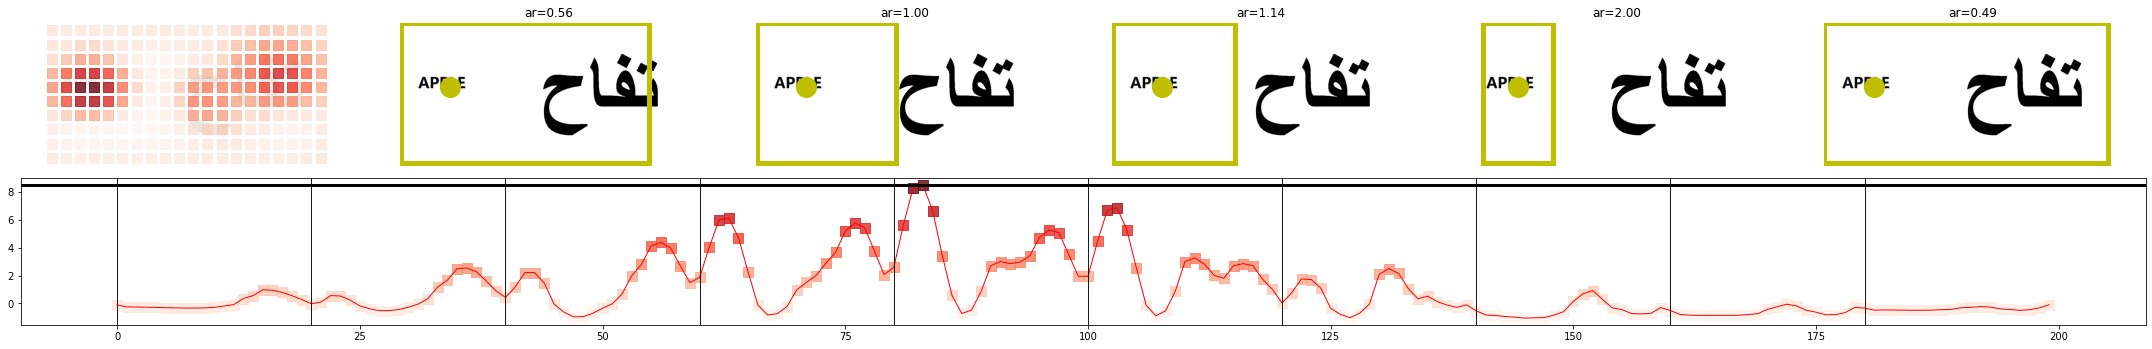

In [23]:
for img_path in data_dir.glob("test_string_length3.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)

5. The above 5 tests were hand picked qualitative tests run to illustrate the bias and also to ensure that bias is NOT due to other factors such as increased text size or number of characters or position of text in image.

6. Testing was also performed, from a quantitative perspective, to illustrate this particular bias is wide spread and reproducible. These tests were run across 100+ images and results showed that 90% of the time the saliency based crop algorithm chooses English or other Latin alphabet based text over non-Latin text.


7. Execute the image crop algorithm on 60 generated images to further illustrate this effect.

image-crop-analysis/data/Generated/mountain_f_e.jpg
None 1614 791
image-crop-analysis/data/Generated/fish_e_f.jpg
None 1614 791
image-crop-analysis/data/Generated/sun_e_c.jpg
None 1614 791
image-crop-analysis/data/Generated/long_string_e_a.jpg
None 1614 791
image-crop-analysis/data/Generated/mountain_e_c.jpg
None 1614 791
image-crop-analysis/data/Generated/img_f_e.jpg
None 1788 791
image-crop-analysis/data/Generated/fish_e_c.jpg
None 1614 791
image-crop-analysis/data/Generated/long_string_f_e.jpg
None 1614 791
image-crop-analysis/data/Generated/apple_e_a.jpg
None 1614 791
image-crop-analysis/data/Generated/mountain_e_f.jpg
None 1614 791
image-crop-analysis/data/Generated/long_string_e_h.jpg
None 1614 791
image-crop-analysis/data/Generated/apple_e_h.jpg
None 1614 791
image-crop-analysis/data/Generated/apple_f_c.jpg
None 1614 791
image-crop-analysis/data/Generated/sun_f_c.jpg
None 1614 791
image-crop-analysis/data/Generated/img_f_c.jpg
None 1788 791
image-crop-analysis/data/Generated/img

image-crop-analysis/src/crop_api.py:297: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(constrained_layout=False, figsize=(fig_width, fig_height))


image-crop-analysis/data/Generated/fish_e_a.jpg
None 1614 791
image-crop-analysis/data/Generated/mountain_e_h.jpg
None 1614 791
image-crop-analysis/data/Generated/sun_e_f.jpg
None 1614 791
image-crop-analysis/data/Generated/apple_e_f.jpg
None 1614 791
image-crop-analysis/data/Generated/mountain_c_f.jpg
None 1614 791
image-crop-analysis/data/Generated/img_e_h.jpg
None 1788 791
image-crop-analysis/data/Generated/img_c_f.jpg
None 1788 791
image-crop-analysis/data/Generated/apple_c_e.jpg
None 1614 791
image-crop-analysis/data/Generated/fish_c_e.jpg
None 1614 791
image-crop-analysis/data/Generated/mountain_f_c.jpg
None 1614 791
image-crop-analysis/data/Generated/img_a_e.jpg
None 1788 791
image-crop-analysis/data/Generated/img_c_e.jpg
None 3000 1484
image-crop-analysis/data/Generated/long_string_e_c.jpg
None 1614 791
image-crop-analysis/data/Generated/long_string_h_e.jpg
None 1614 791
image-crop-analysis/data/Generated/img_e_c.jpg
None 1788 791
image-crop-analysis/data/Generated/sun_c_e.jpg


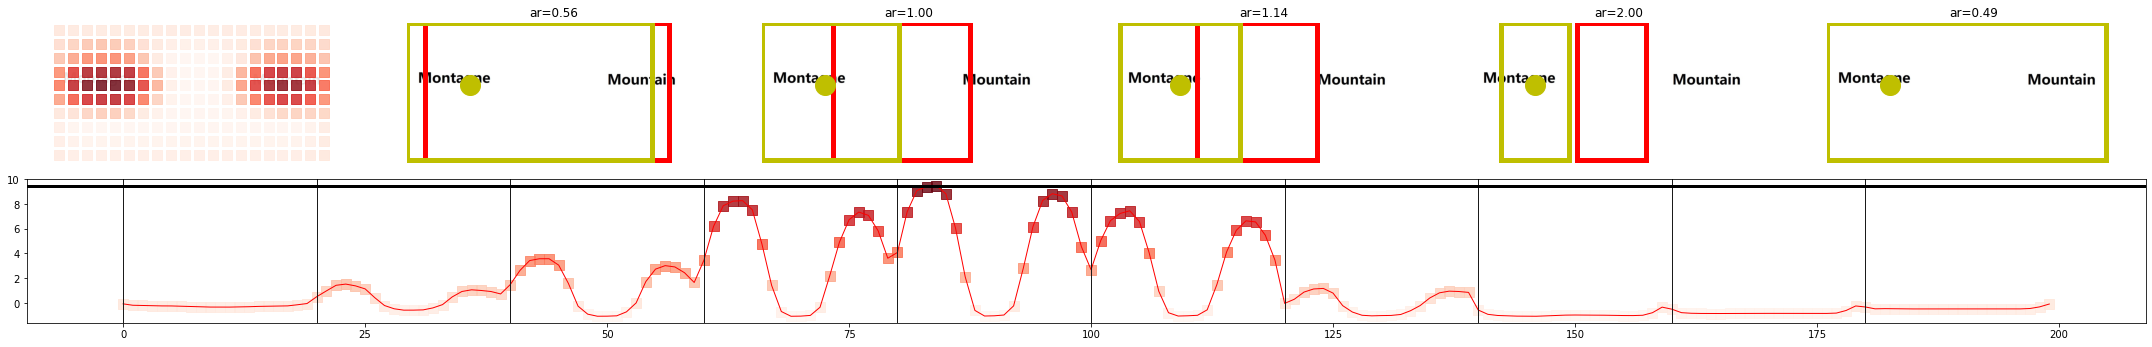

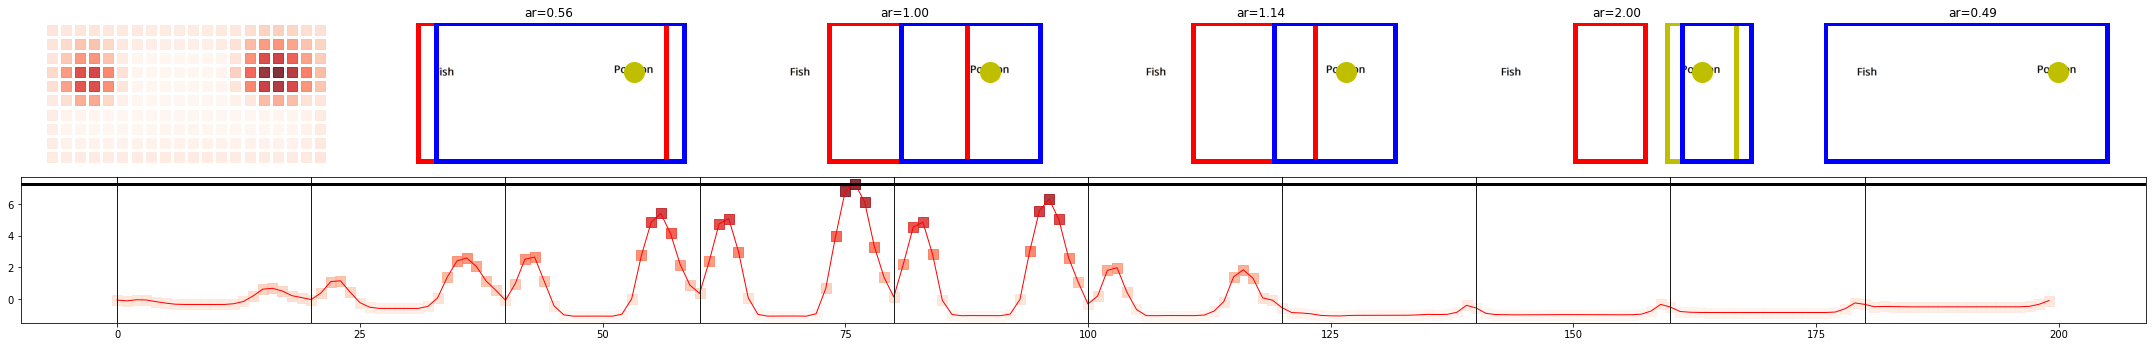

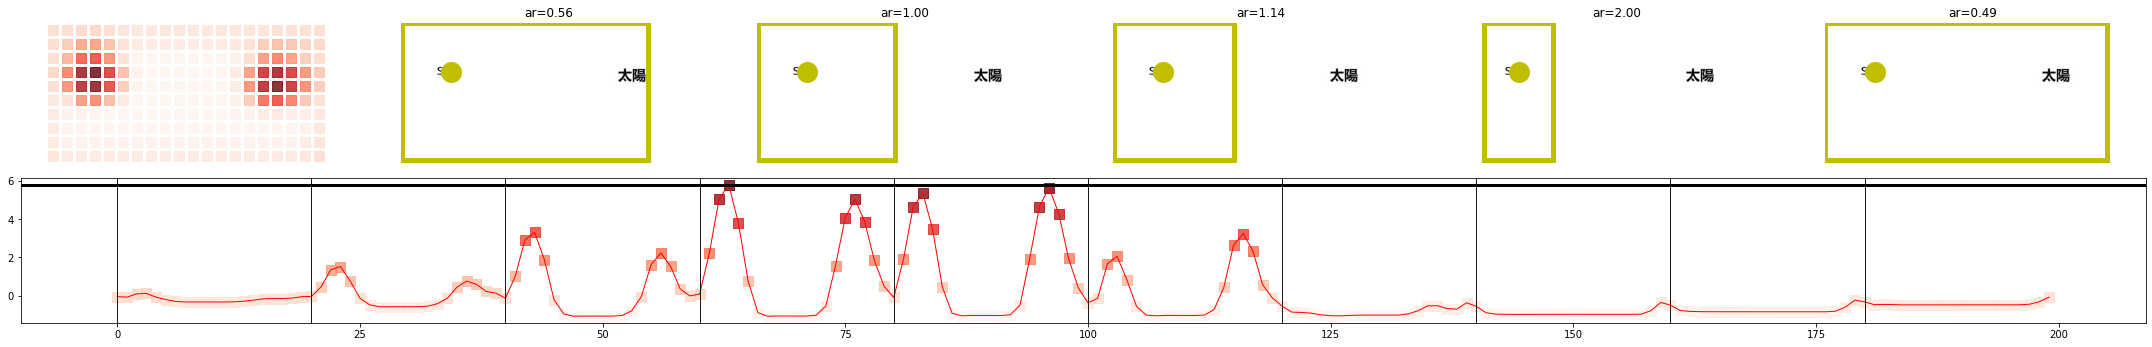

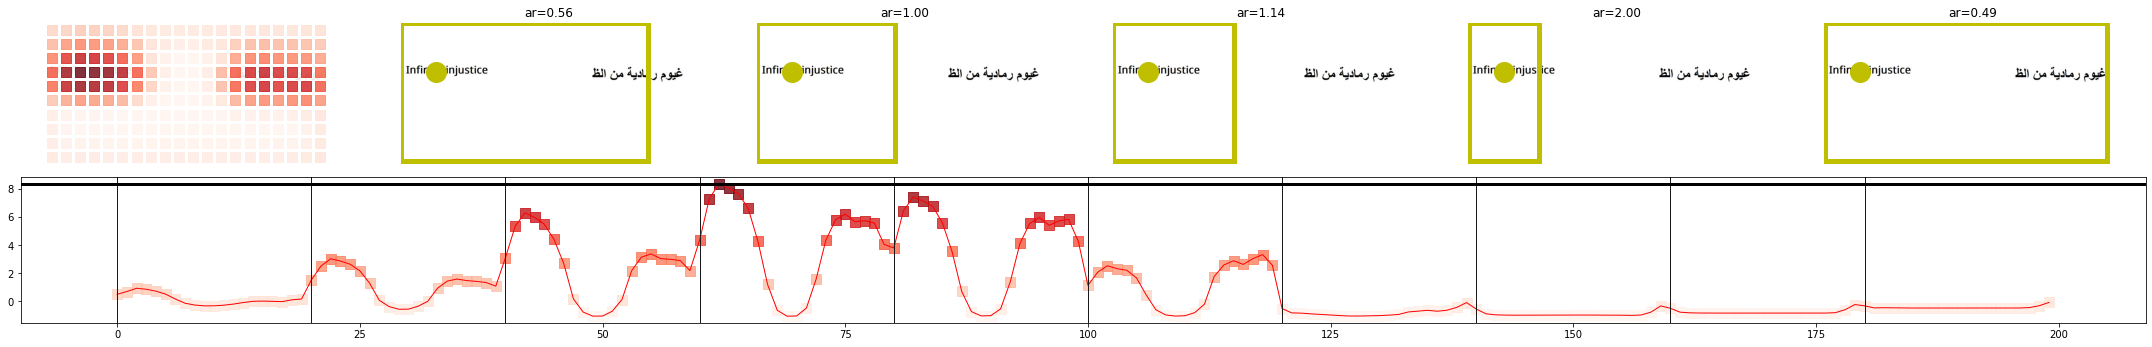

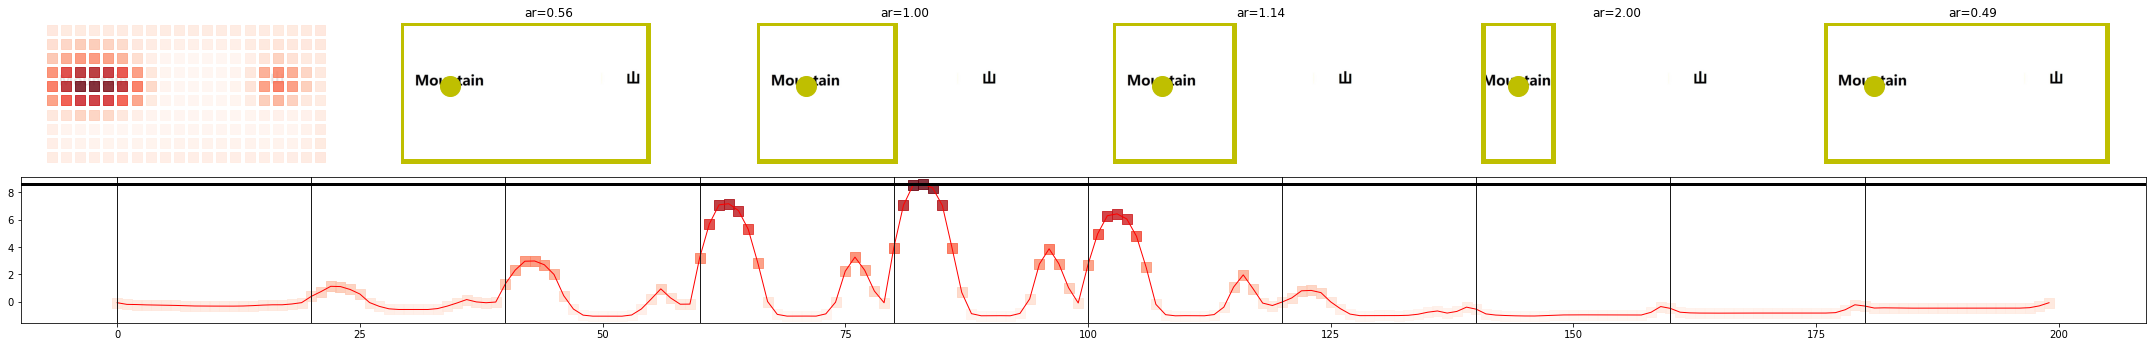

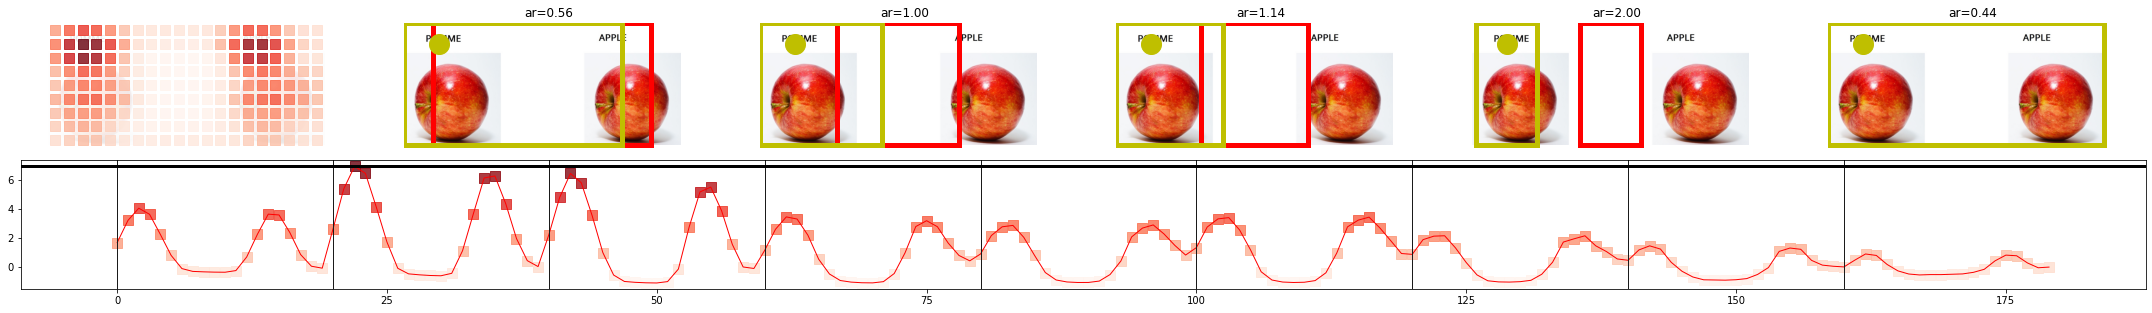

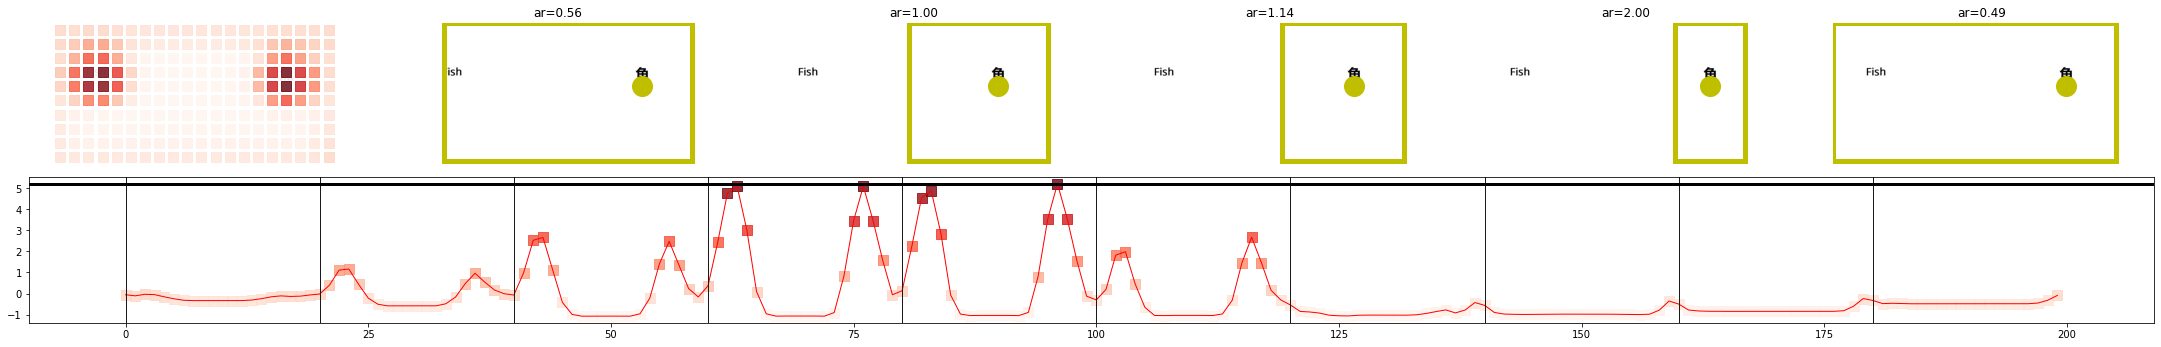

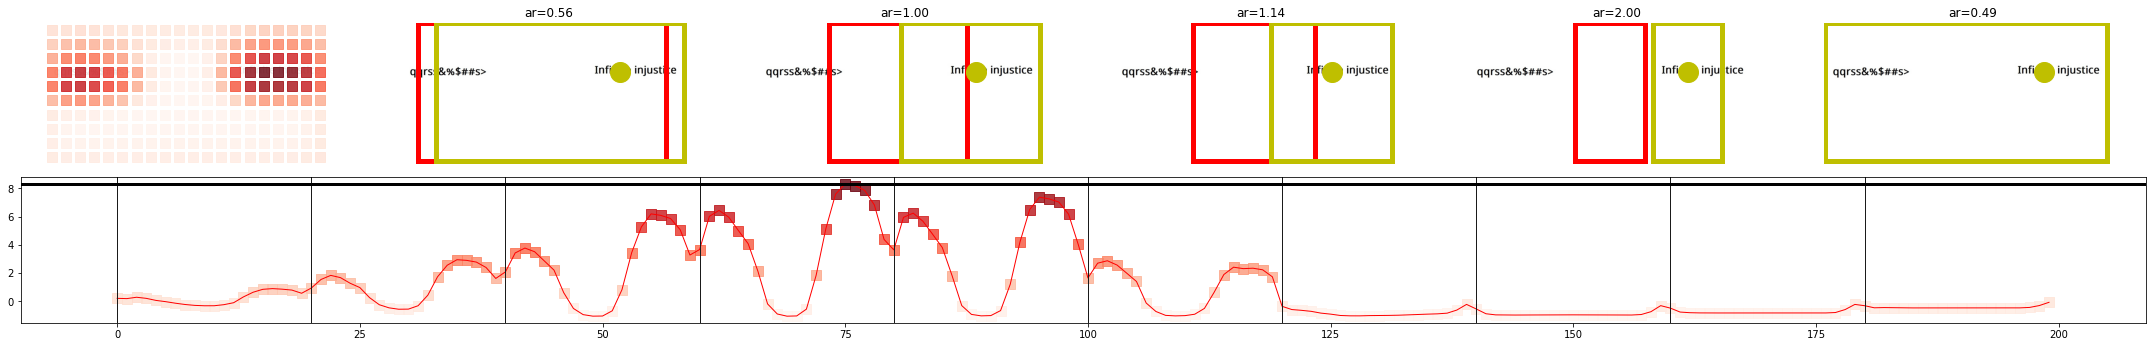

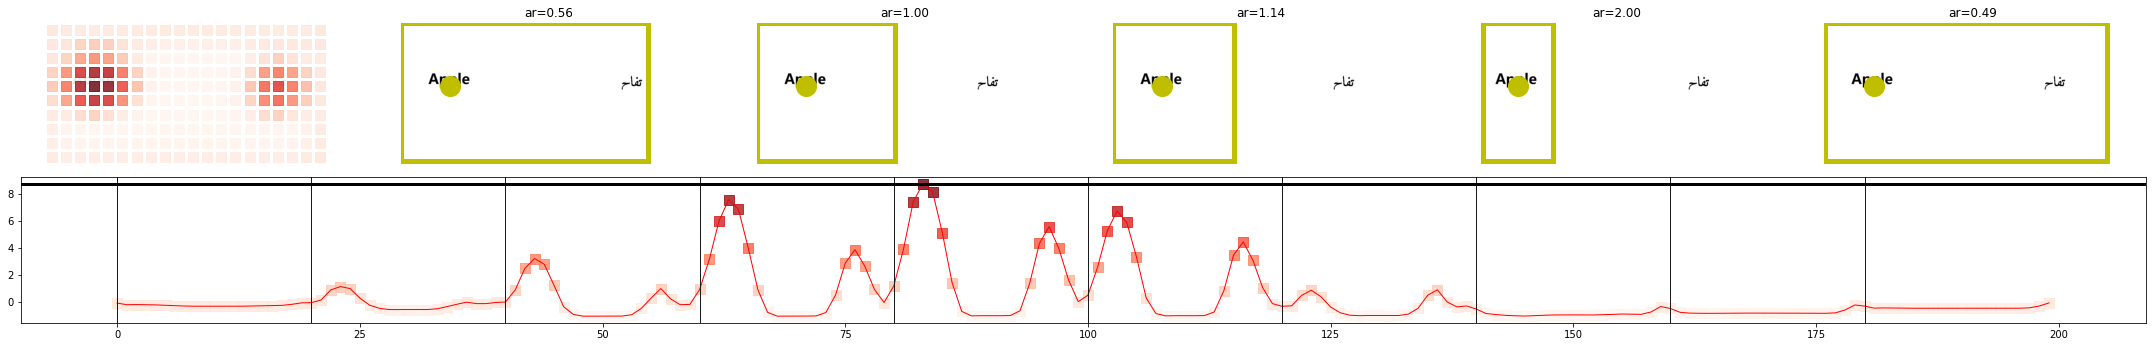

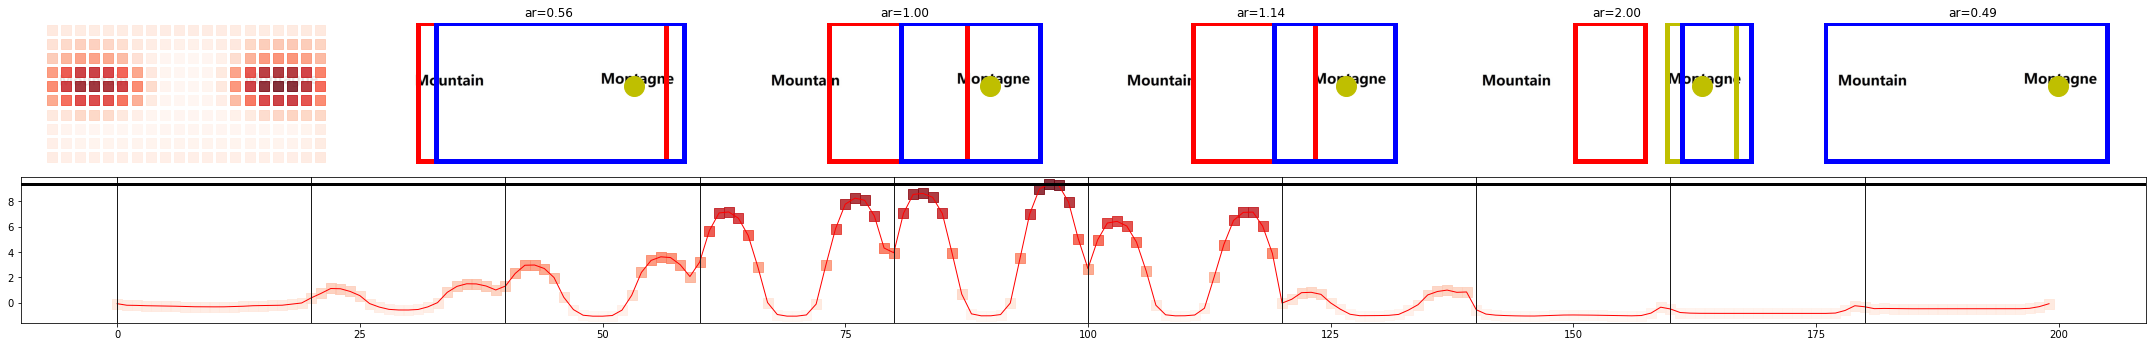

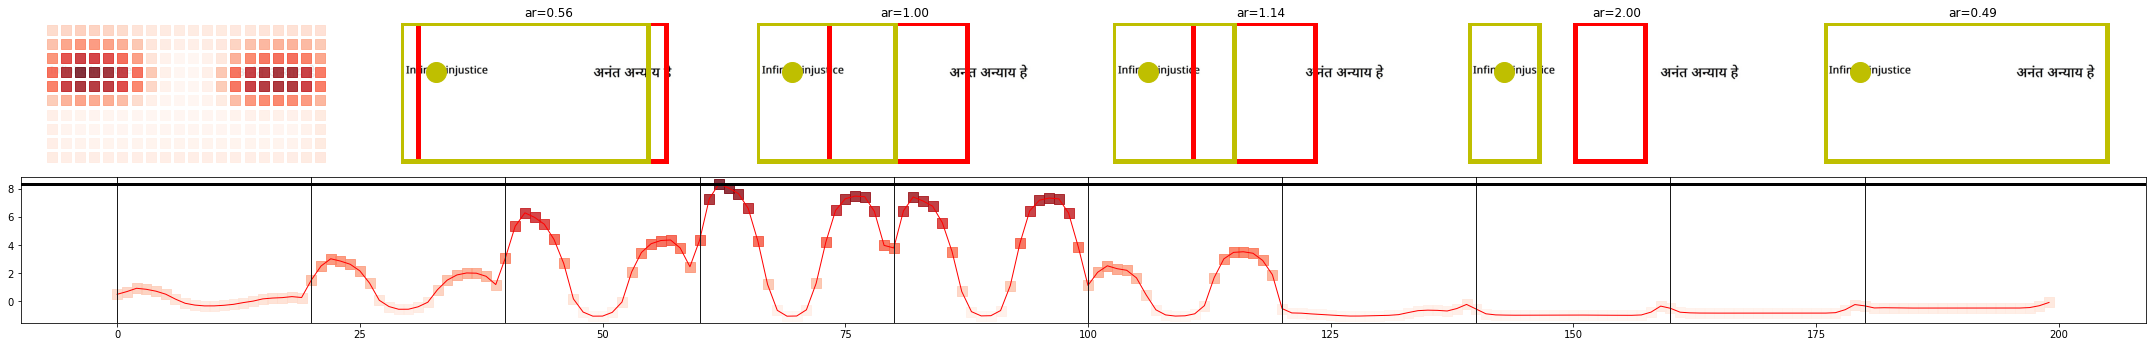

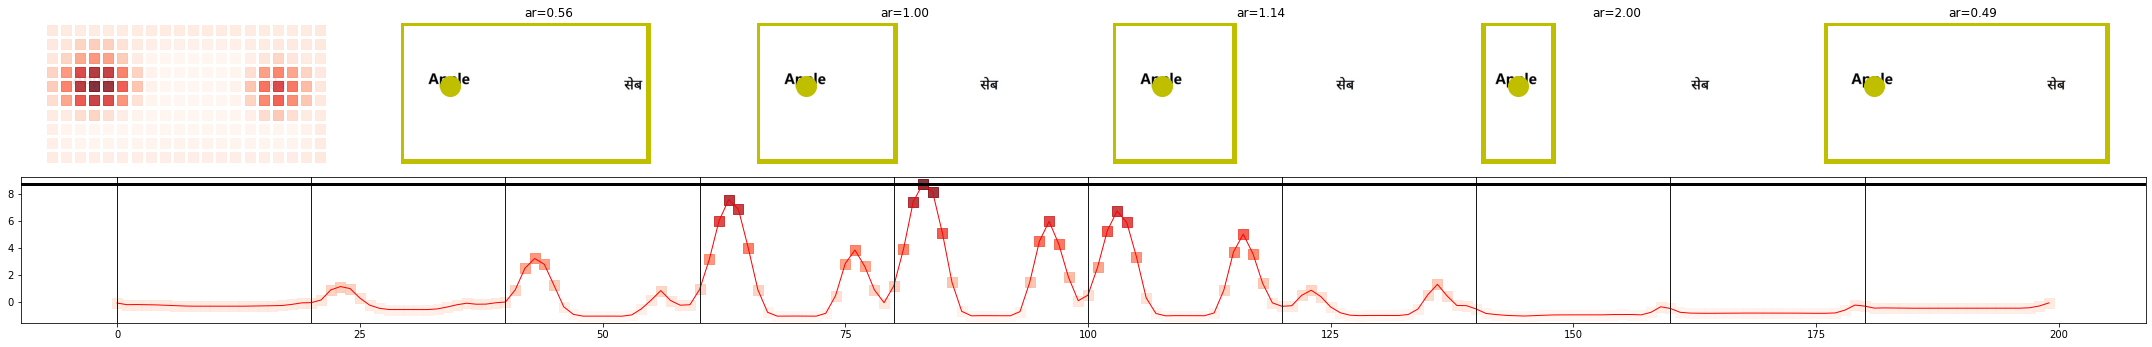

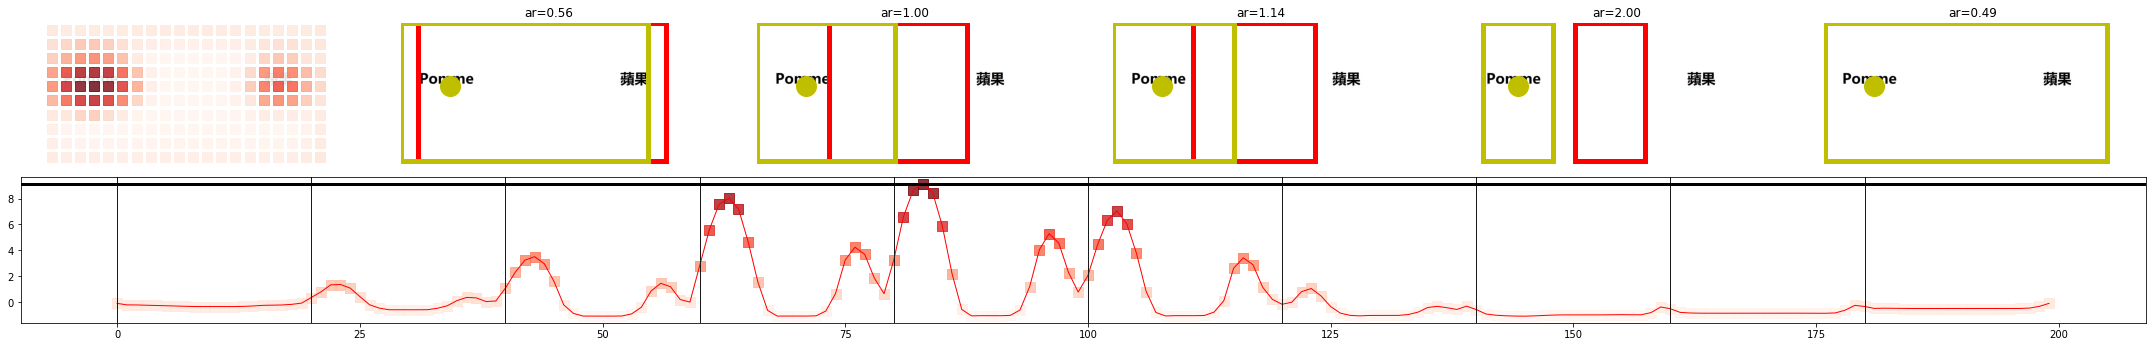

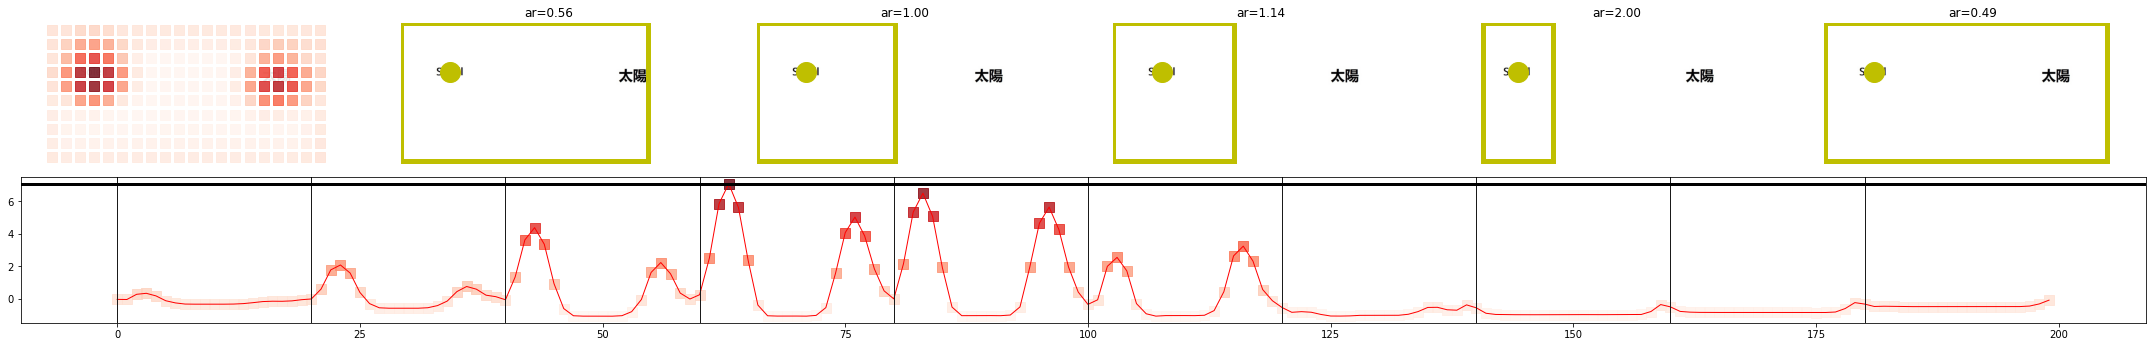

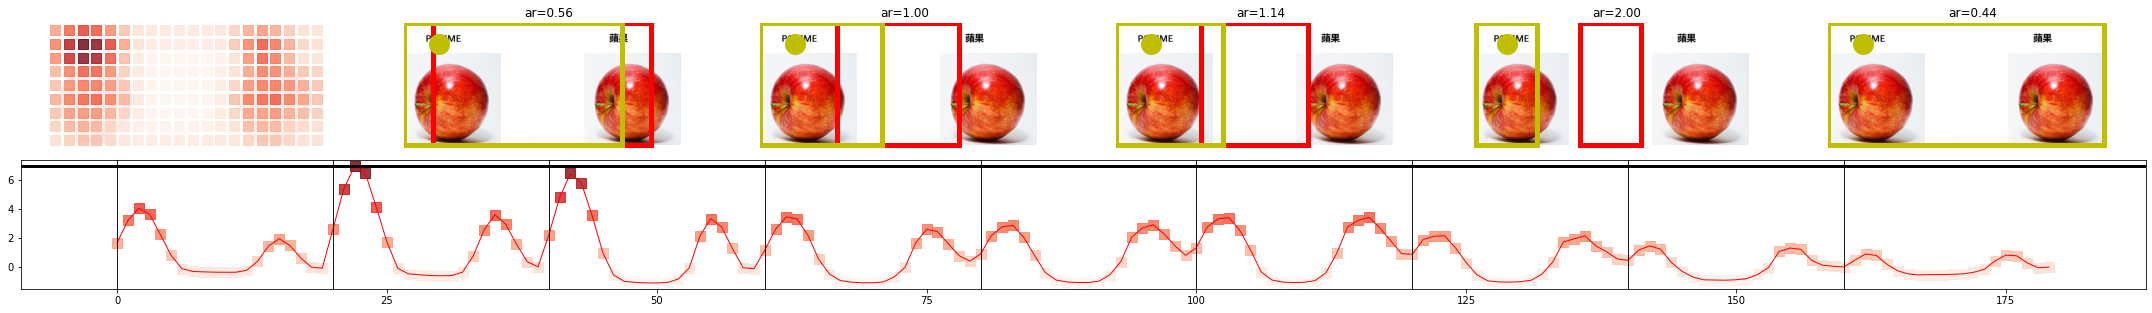

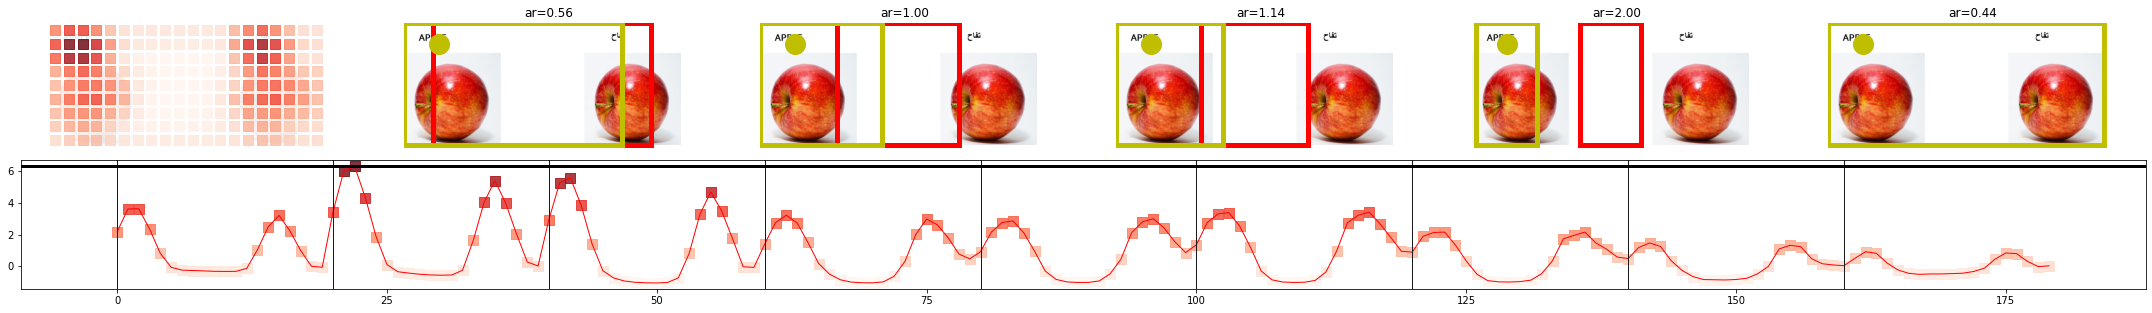

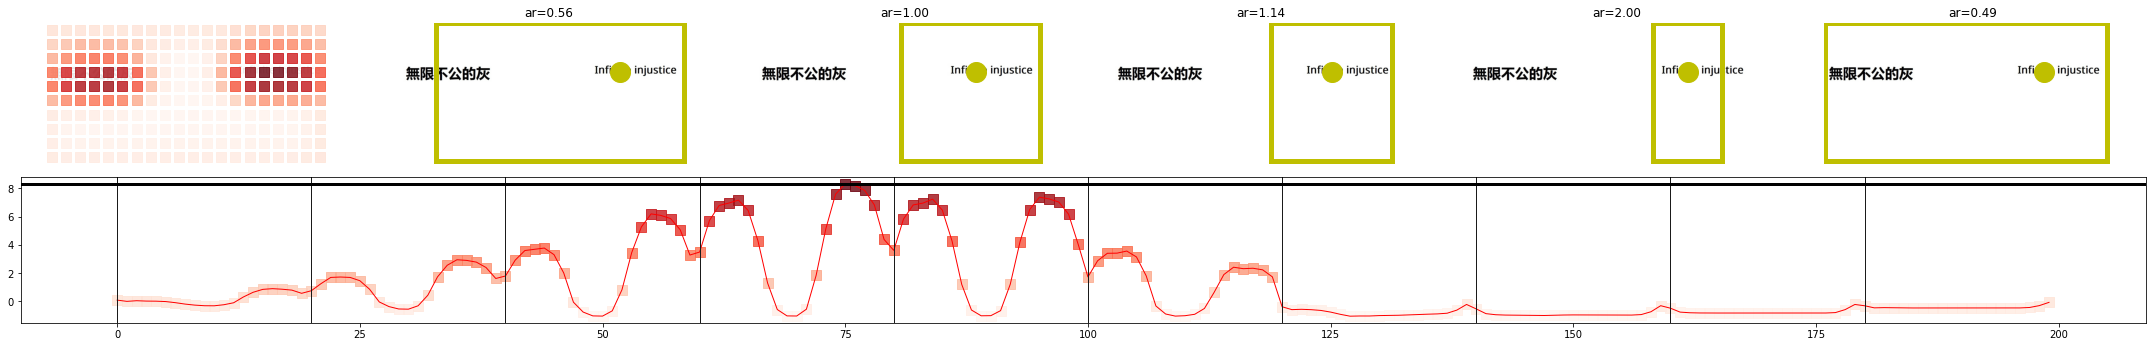

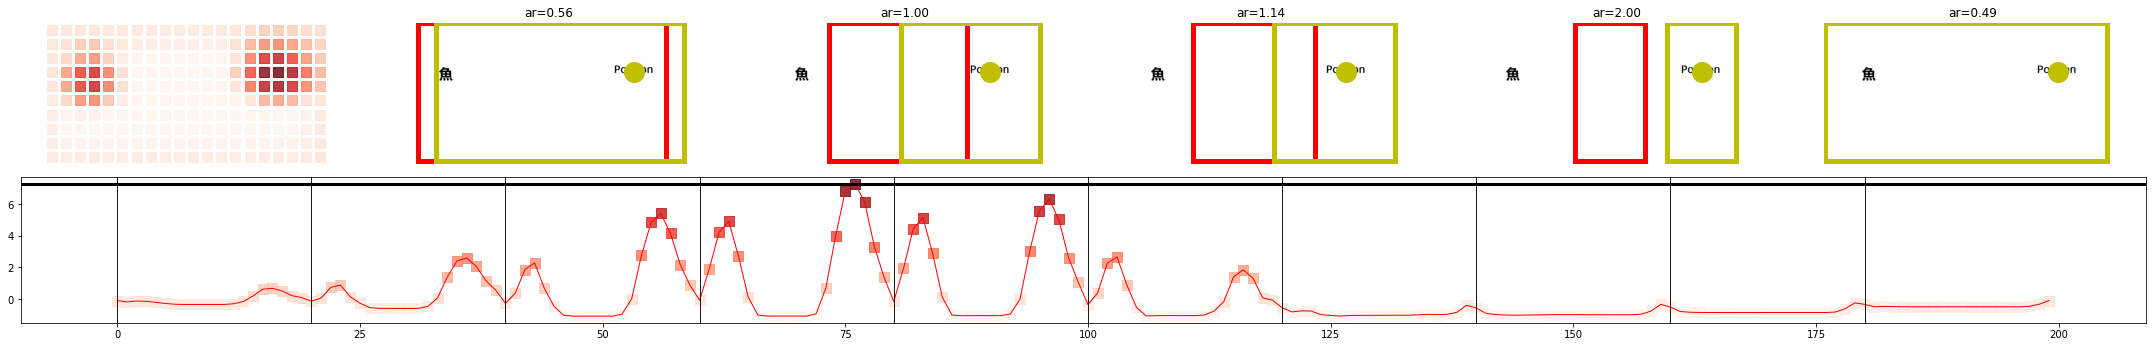

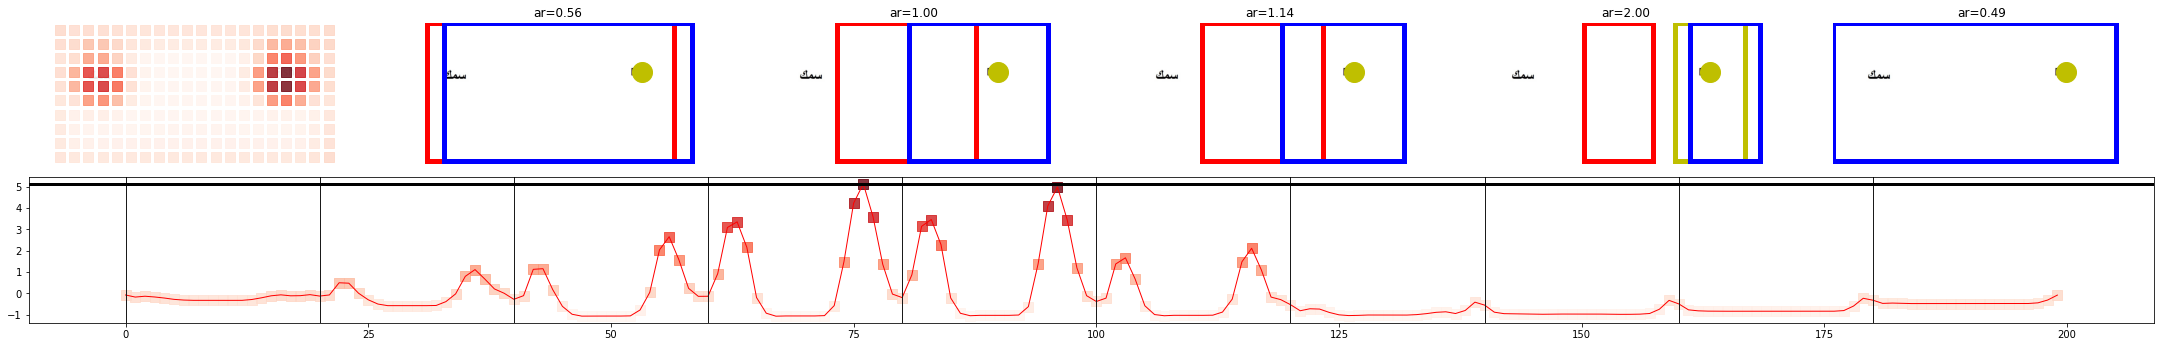

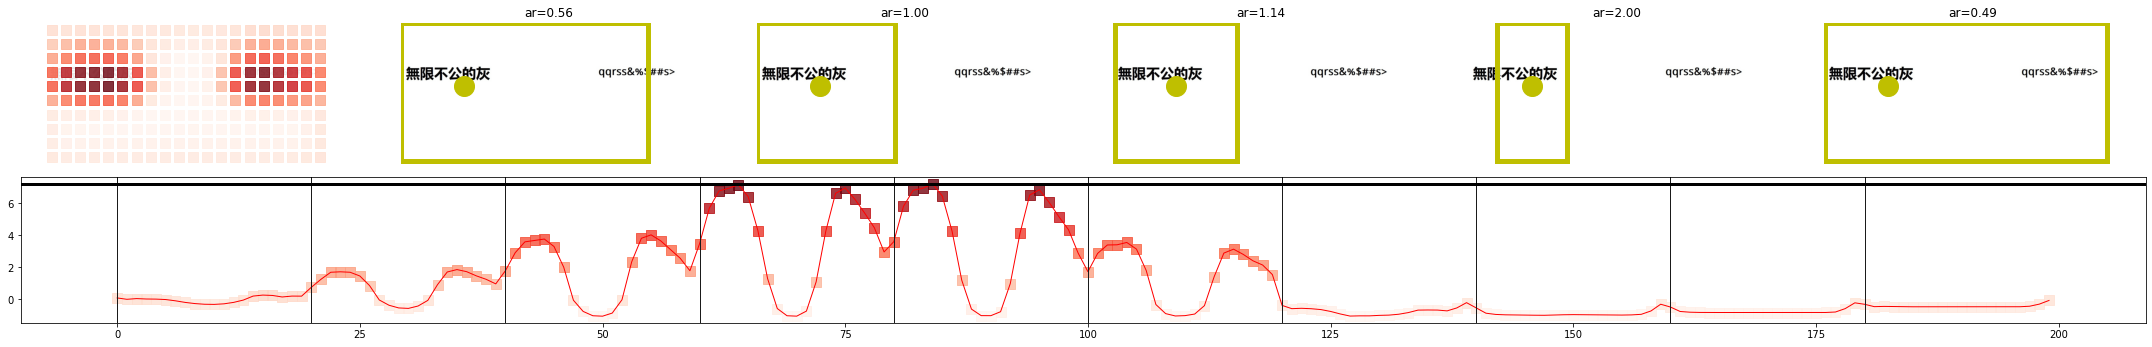

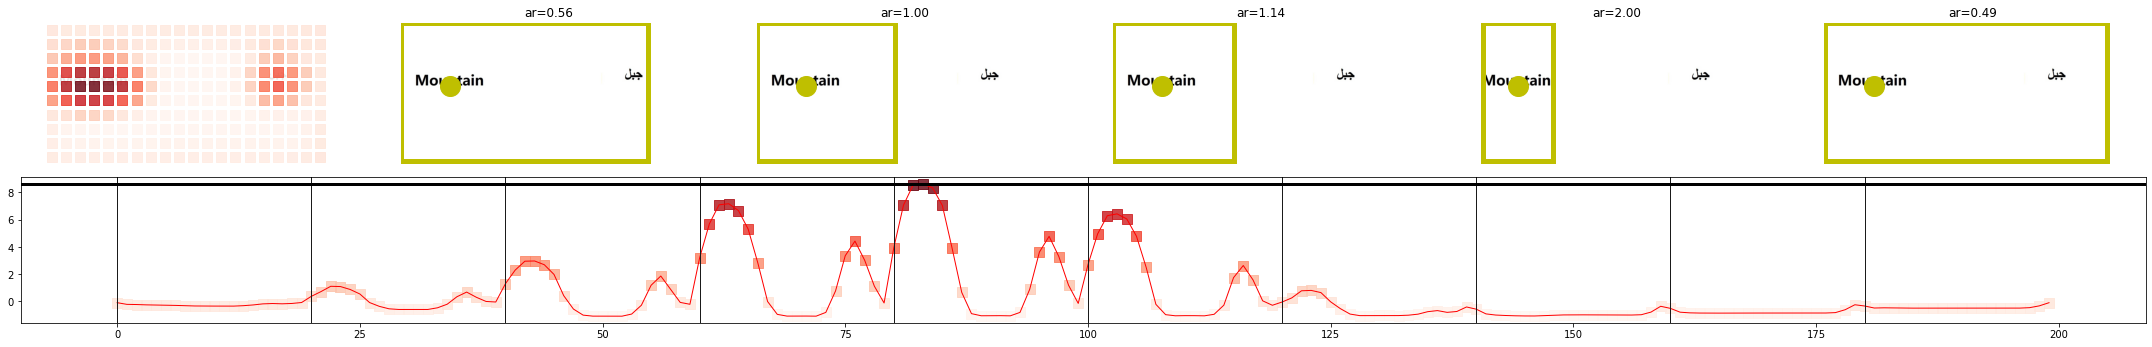

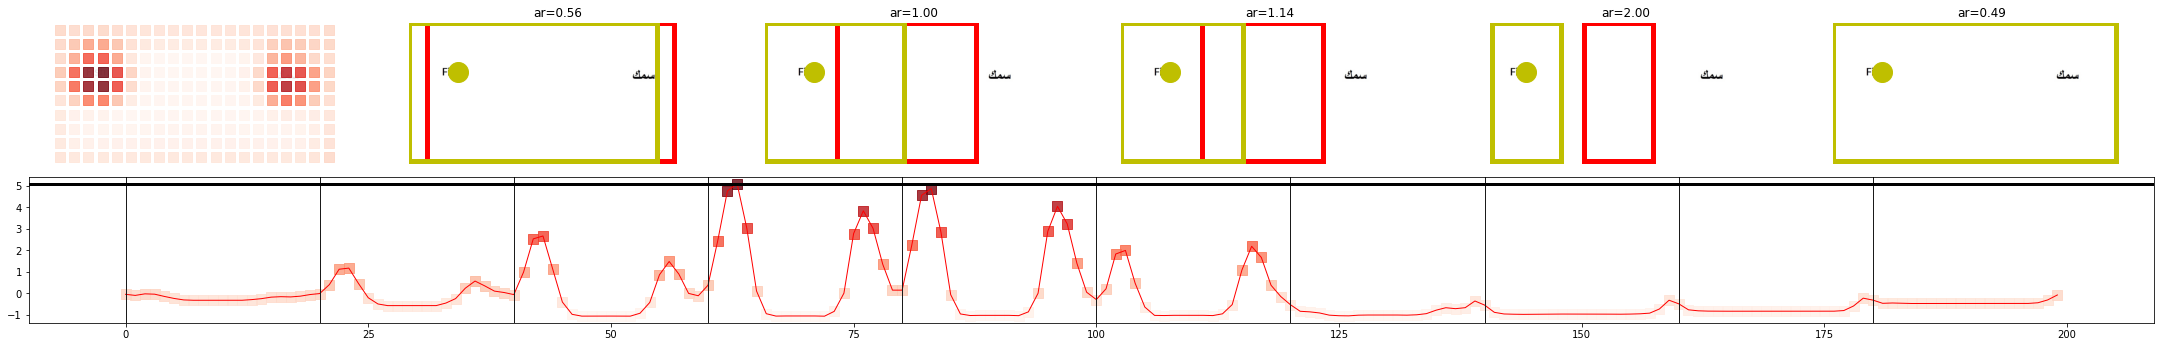

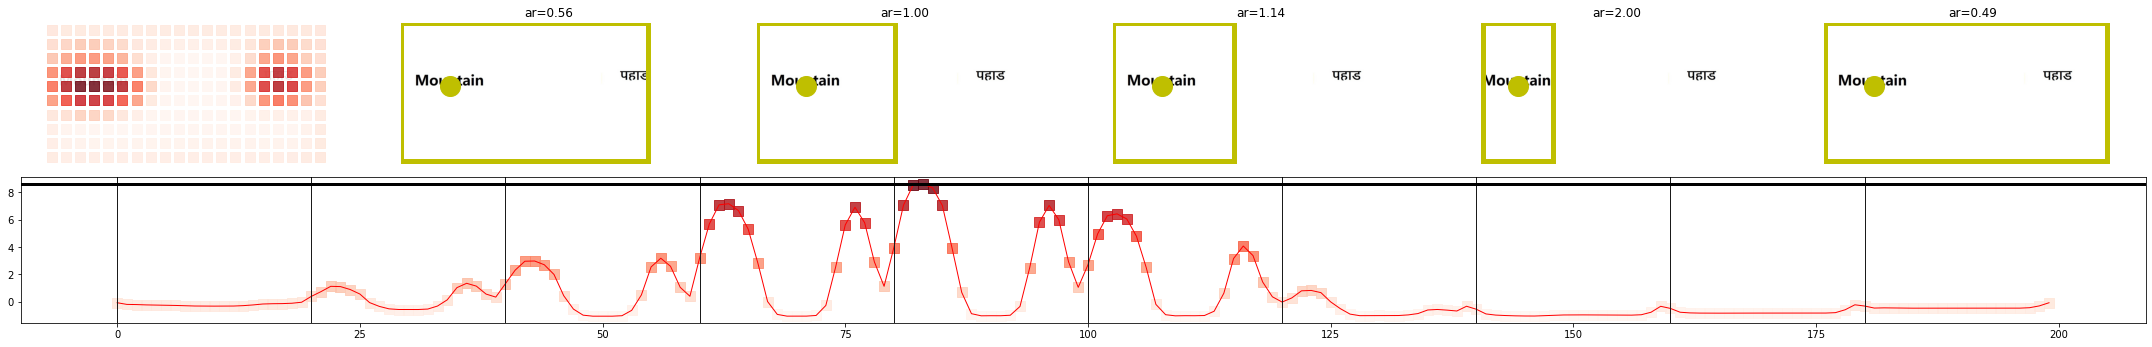

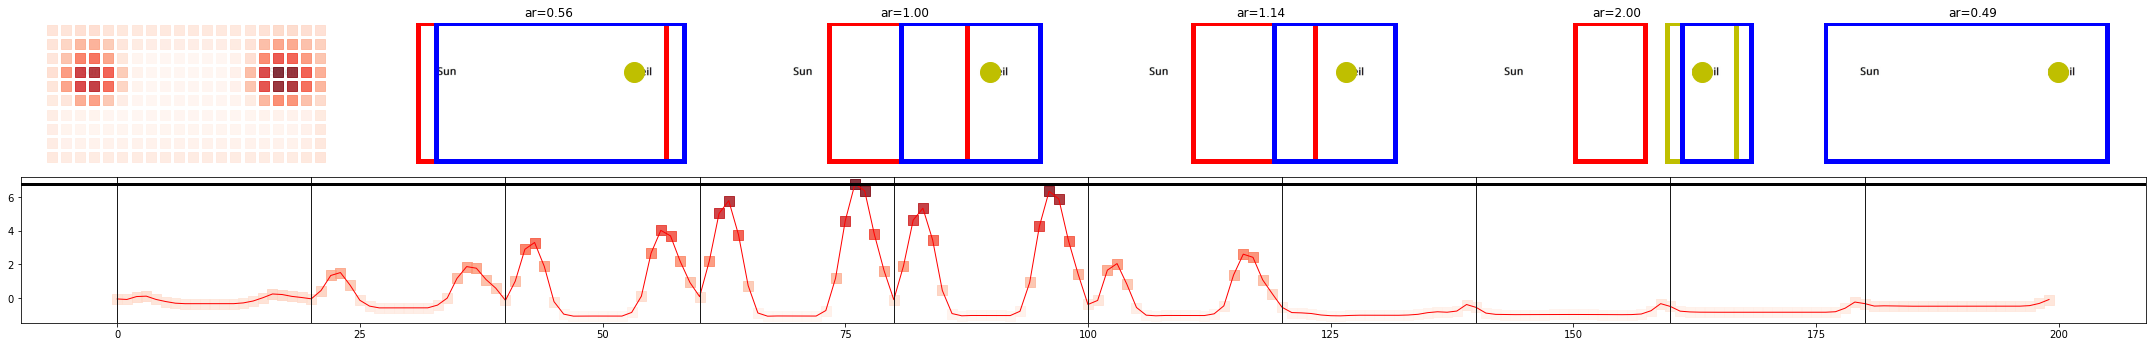

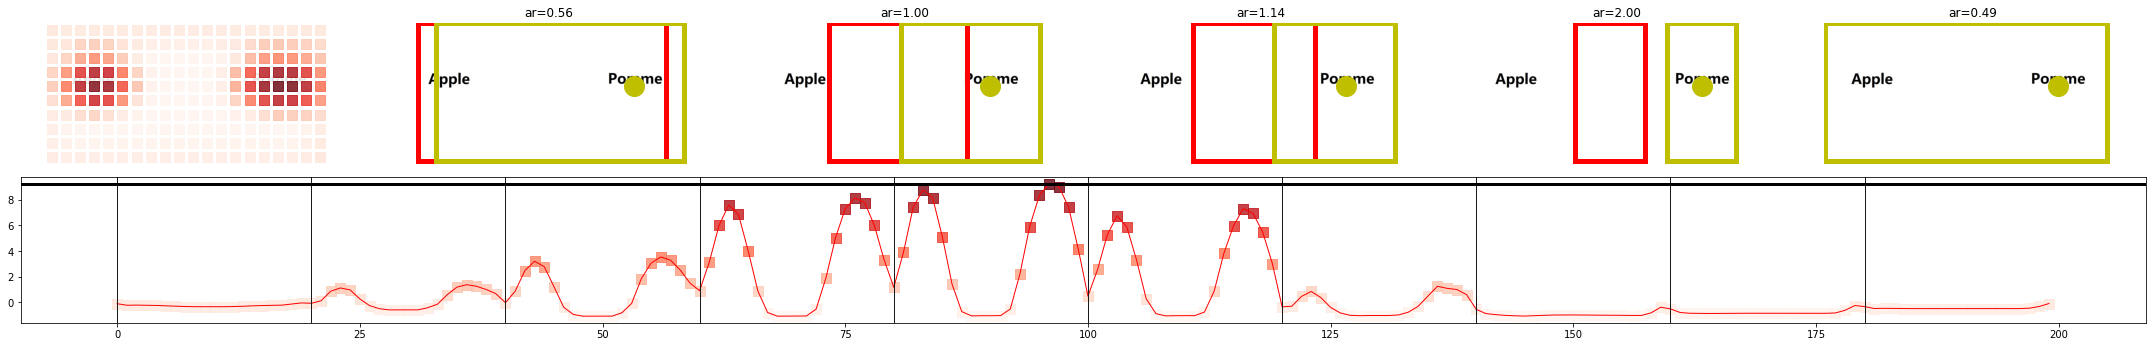

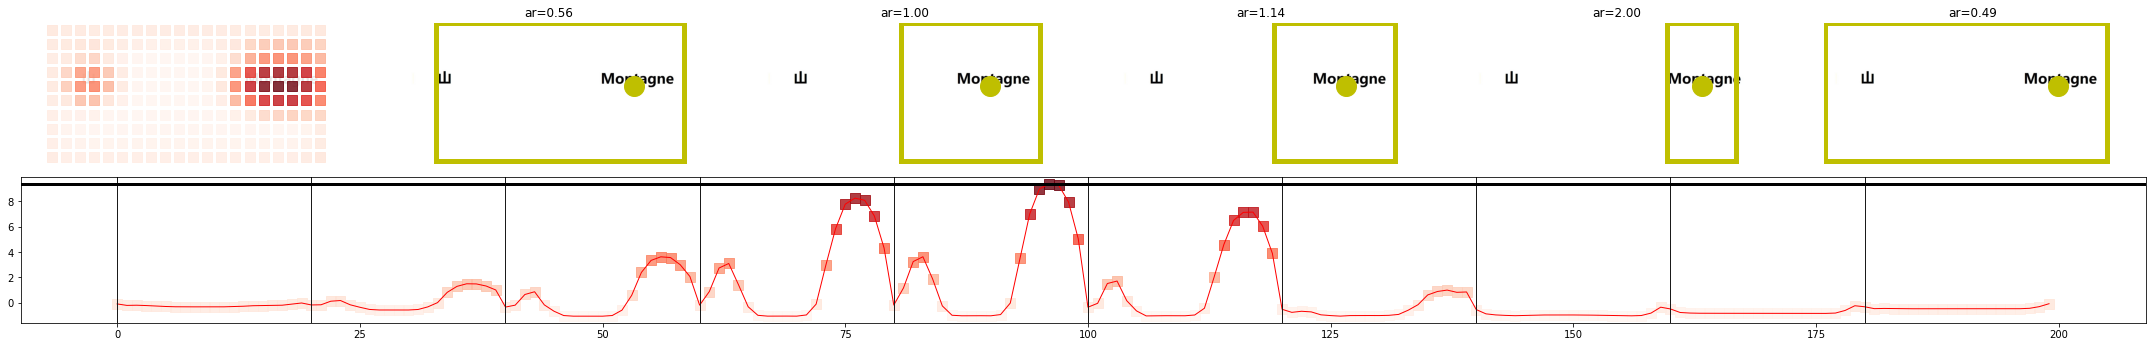

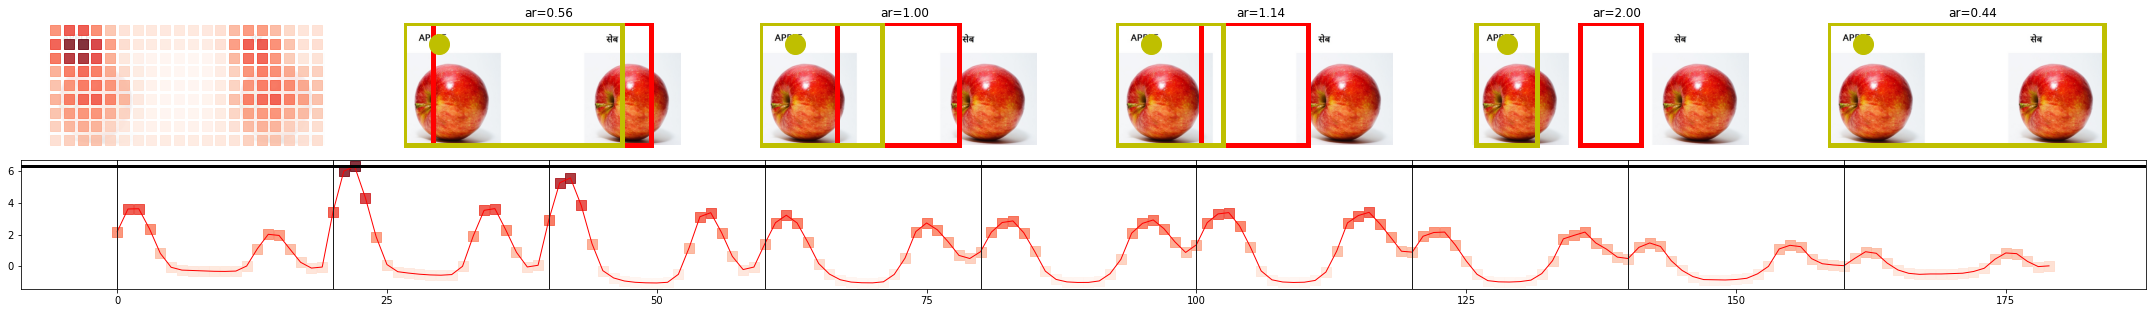

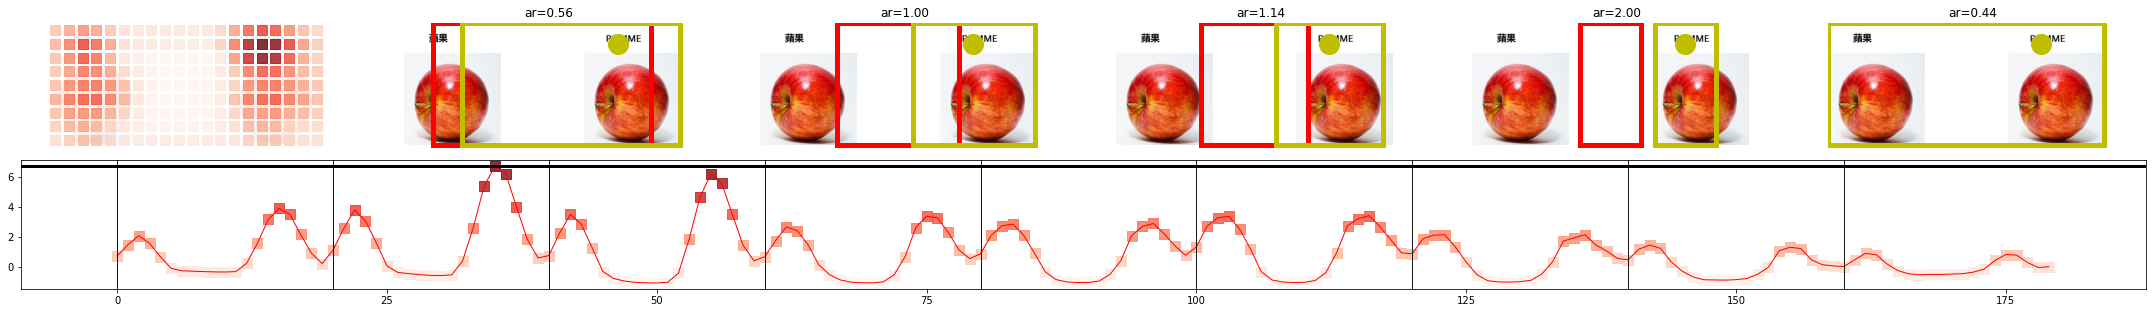

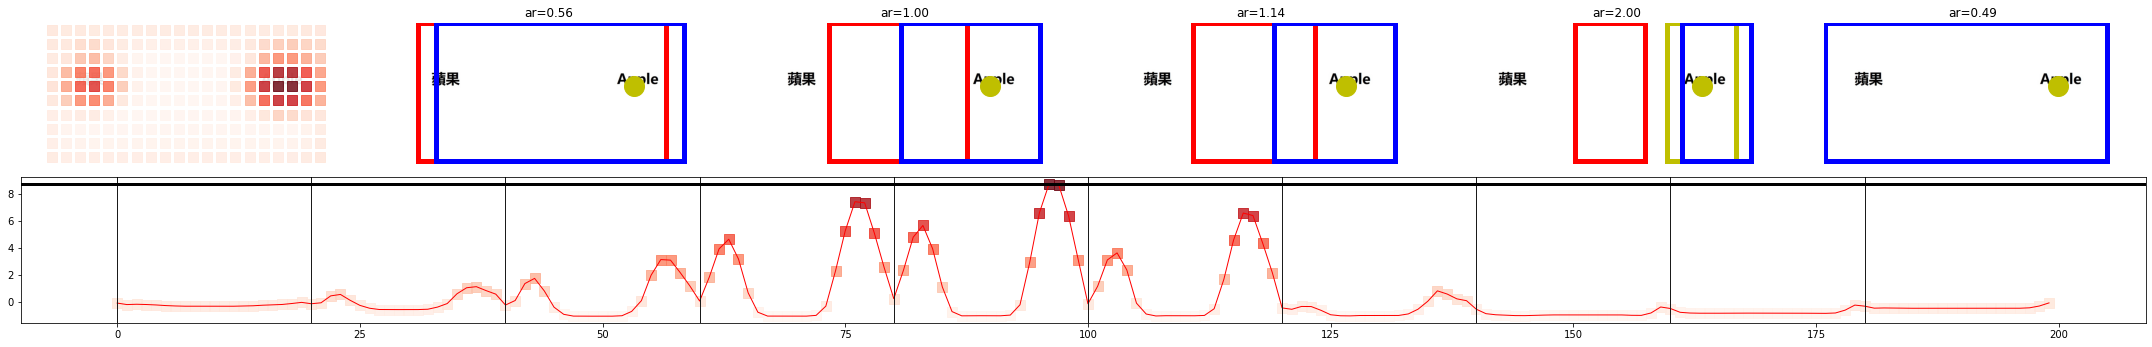

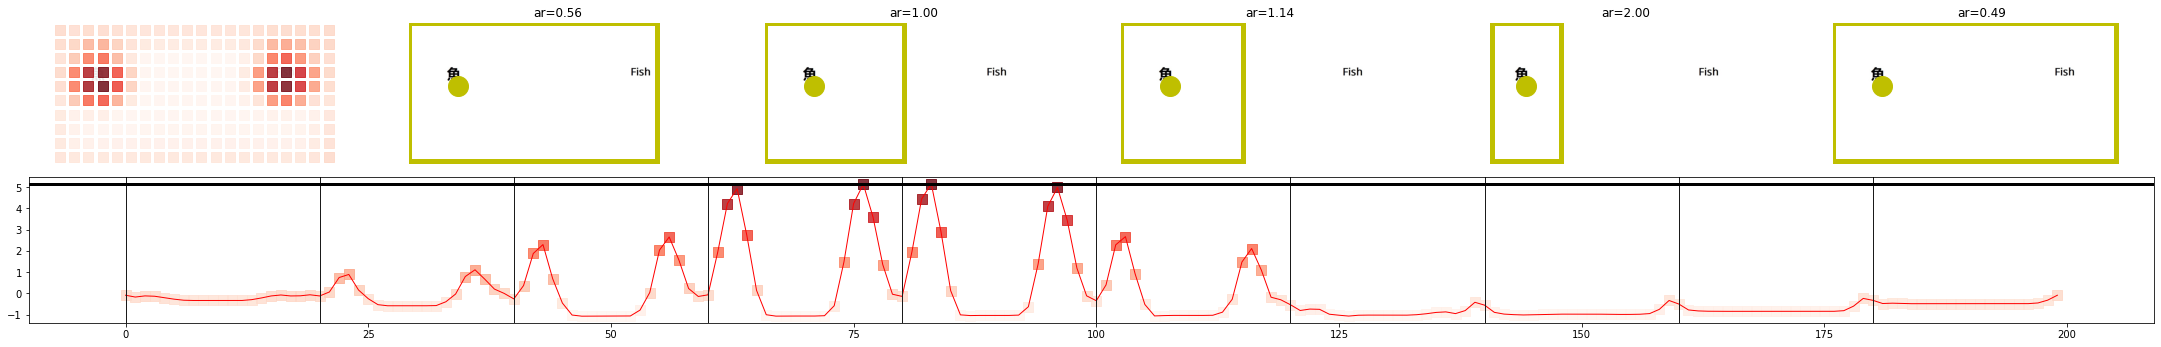

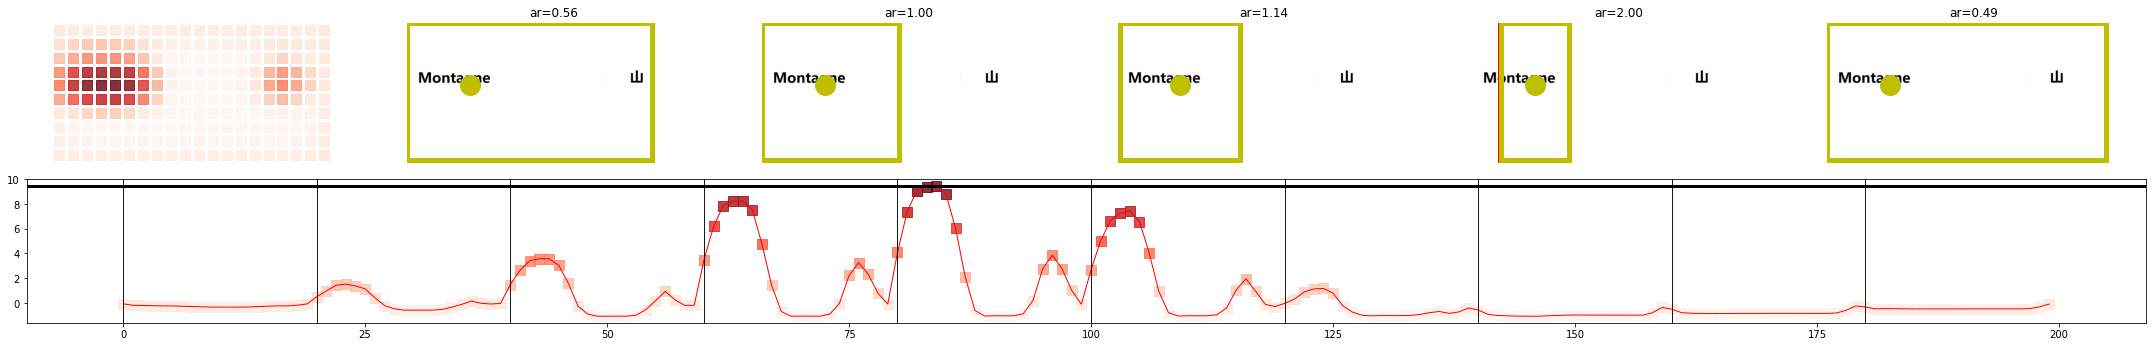

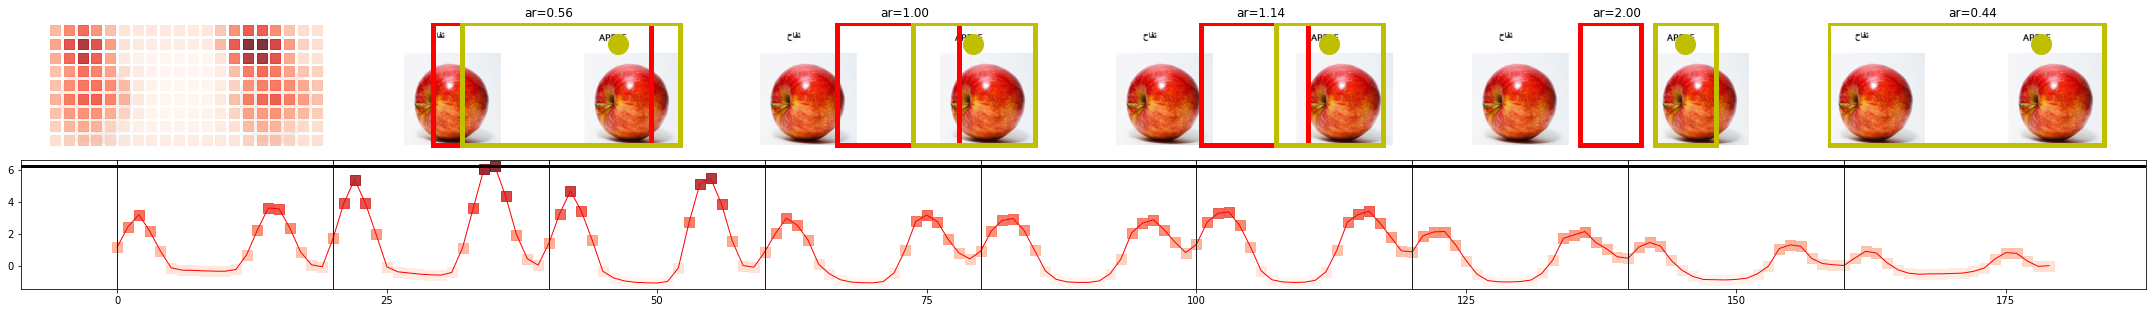

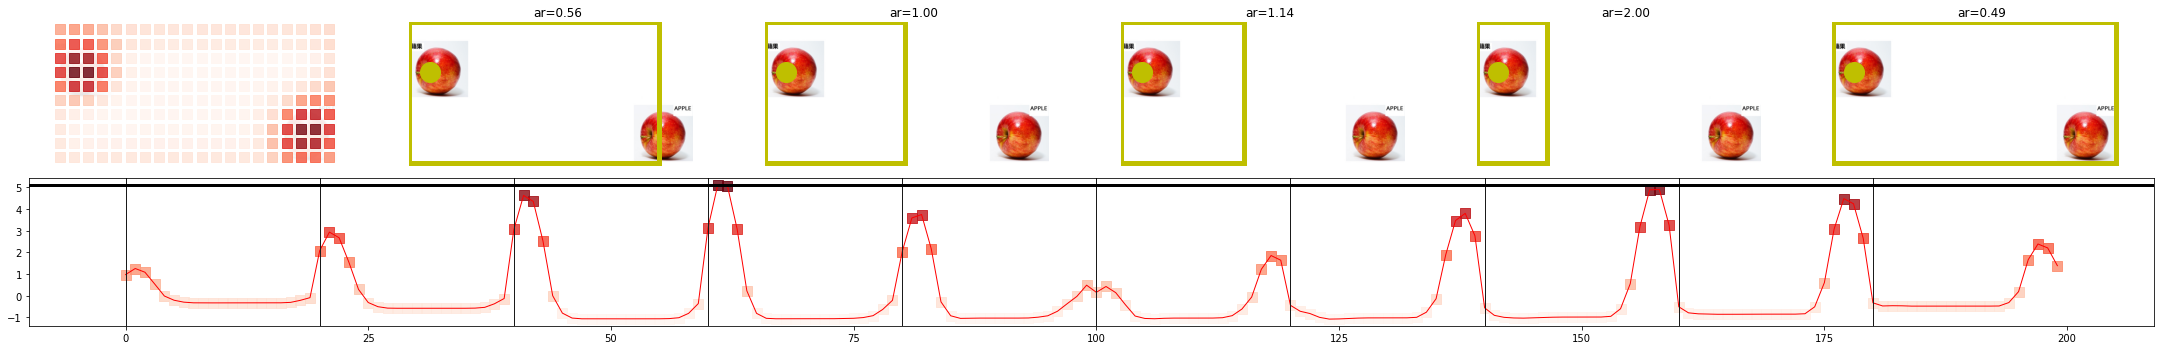

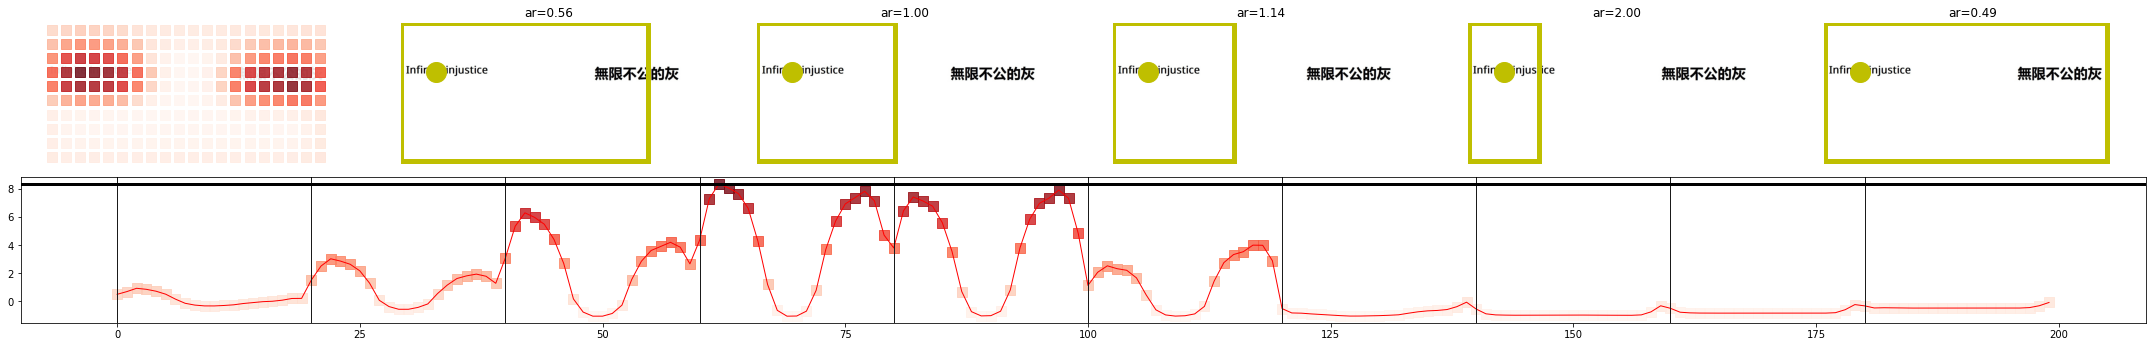

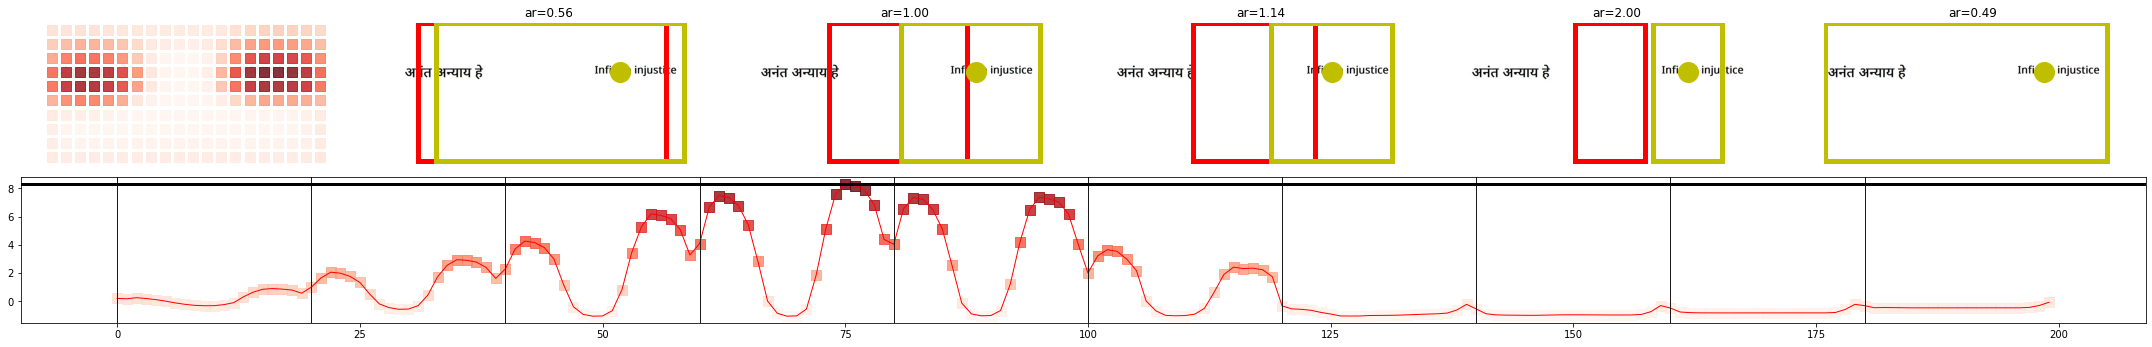

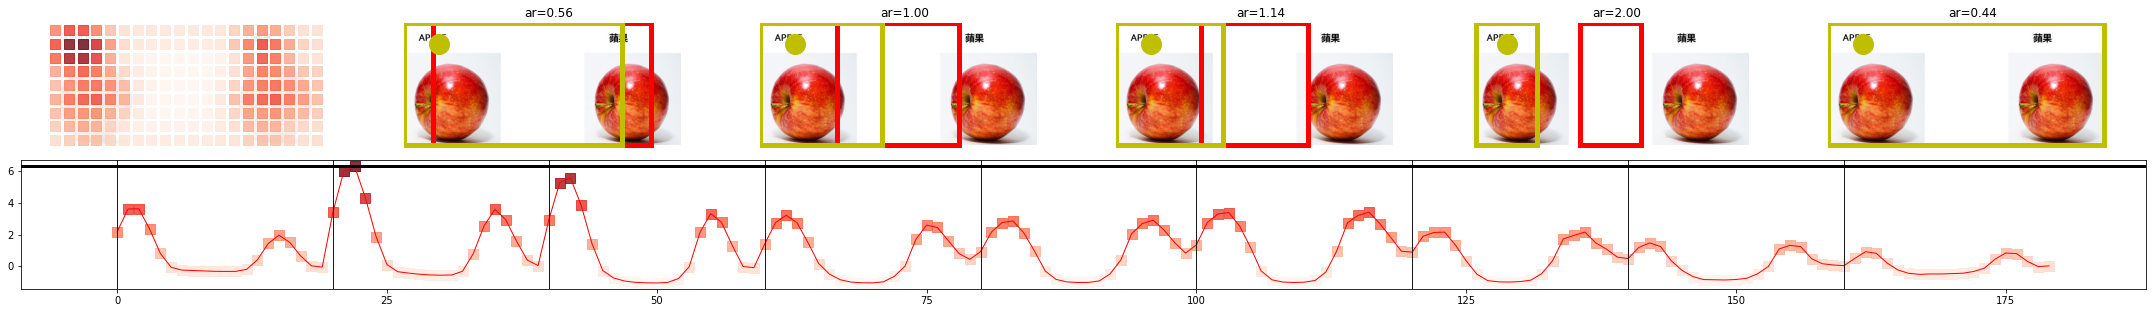

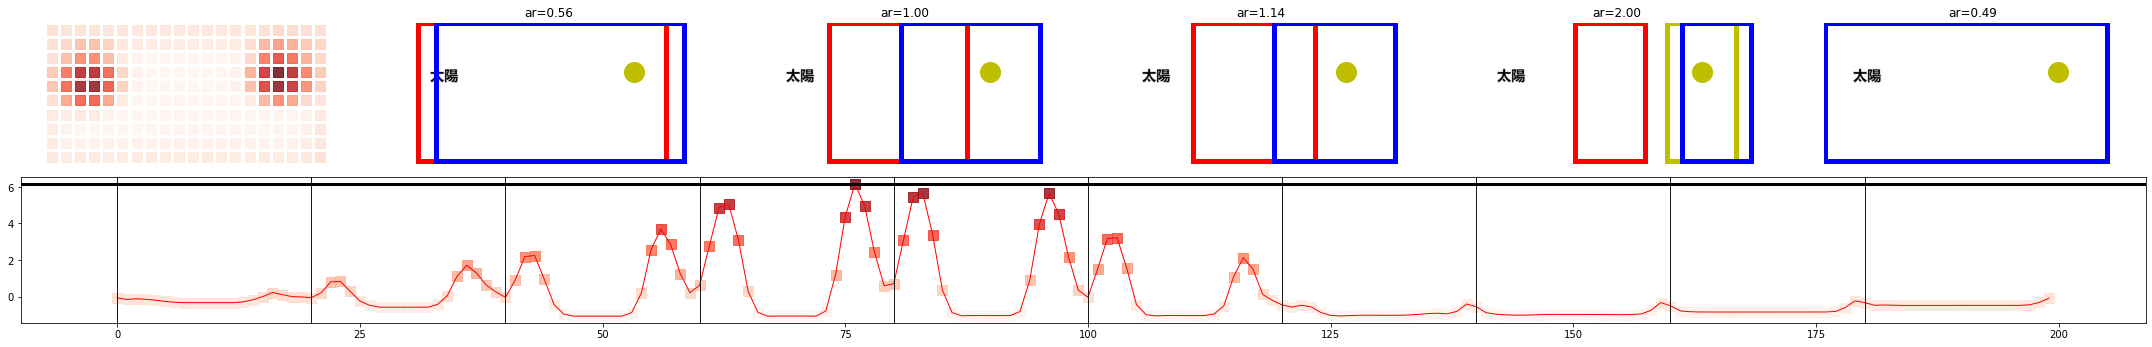

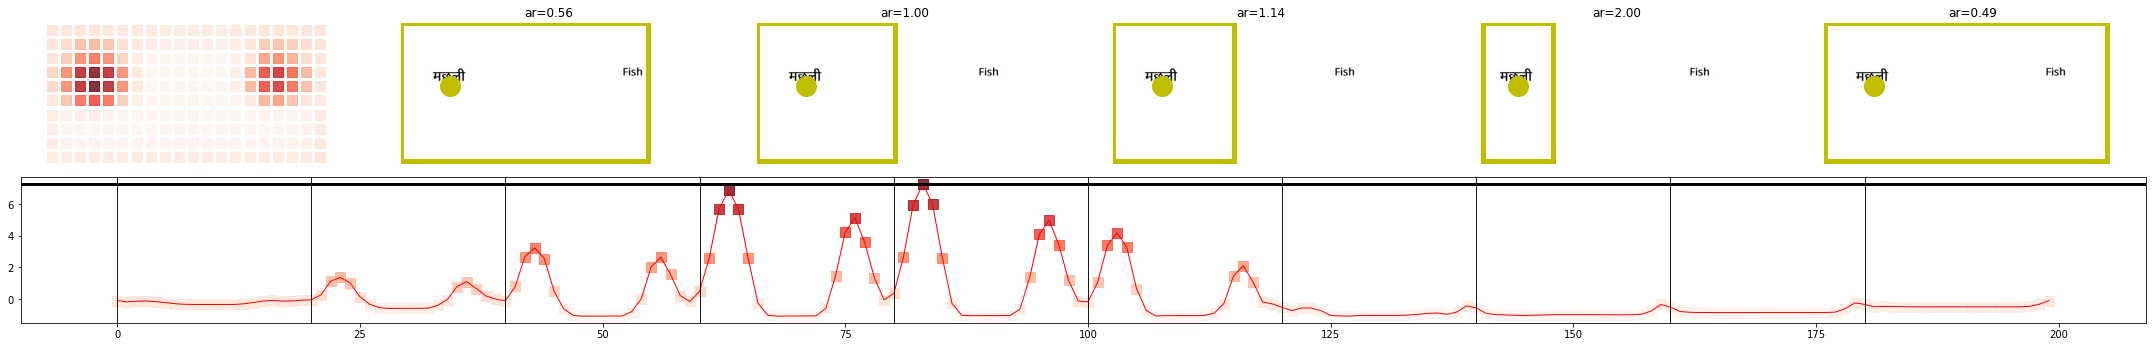

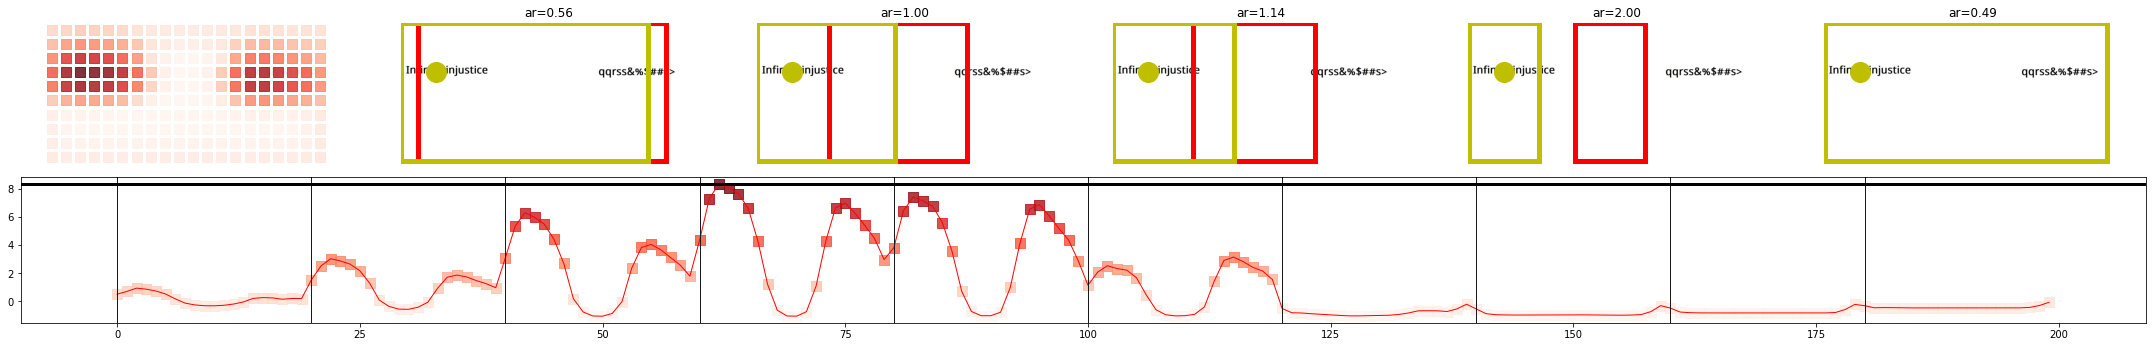

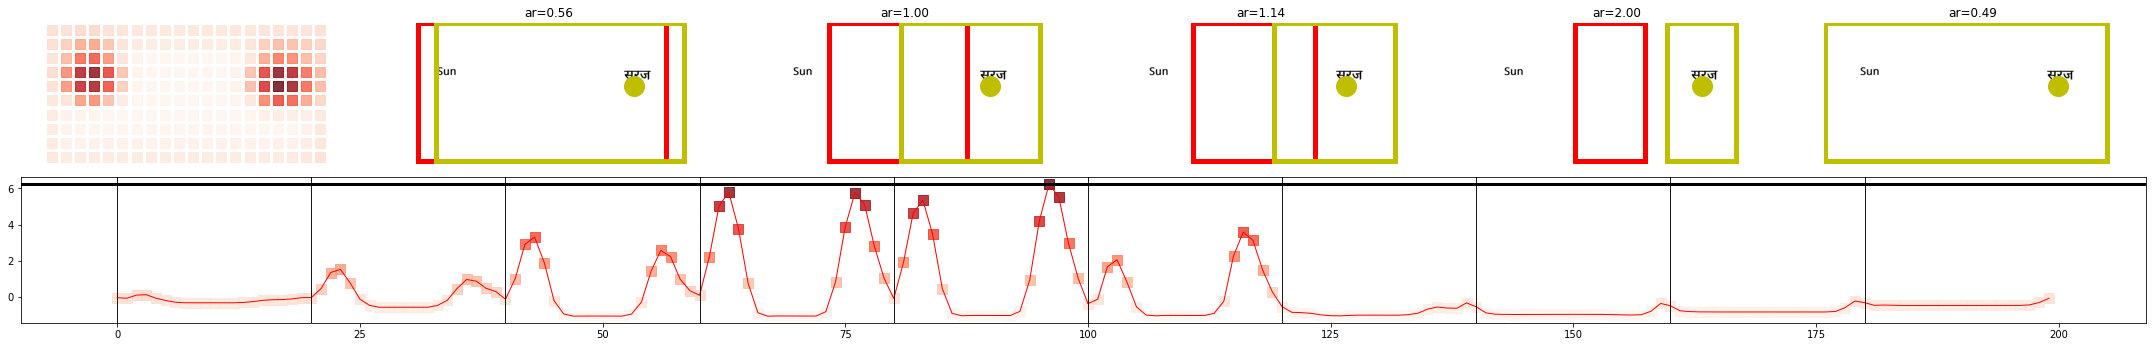

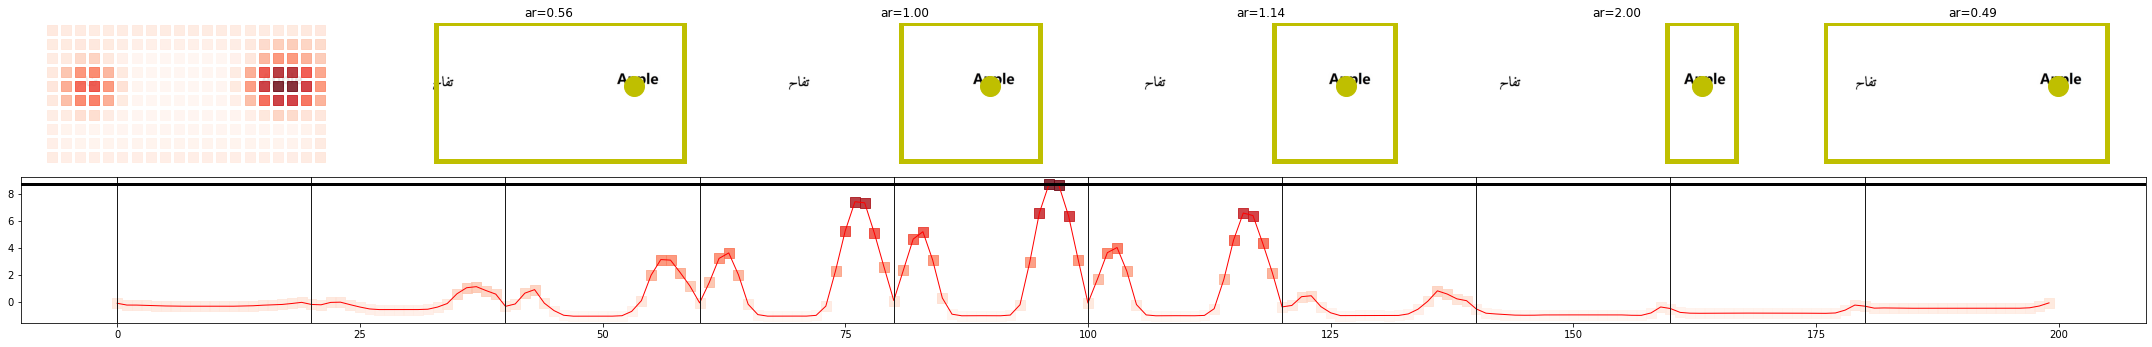

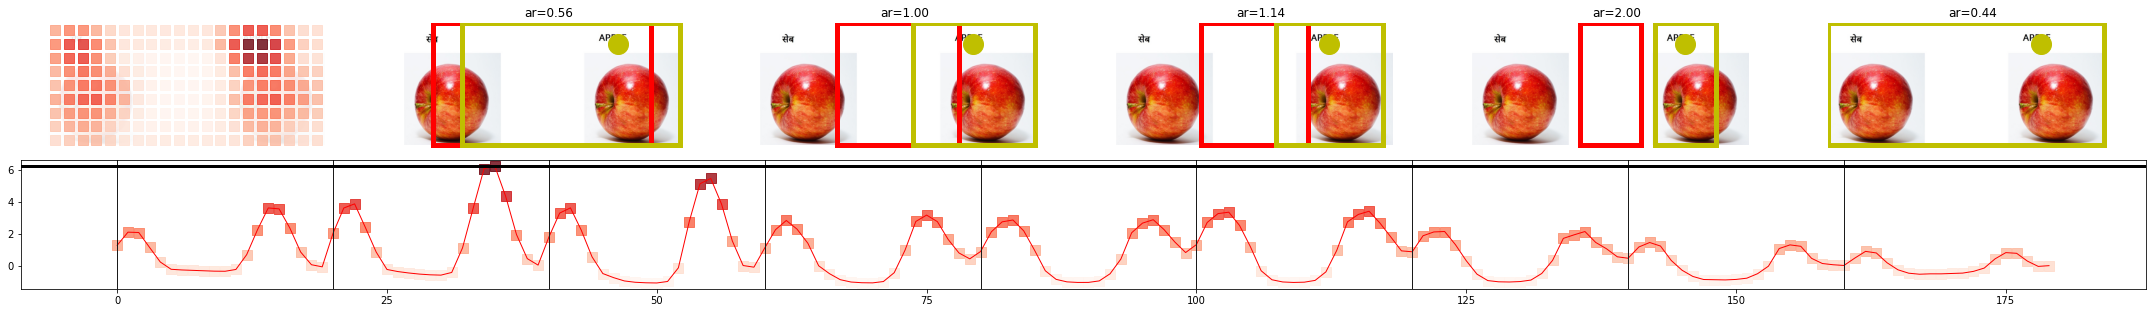

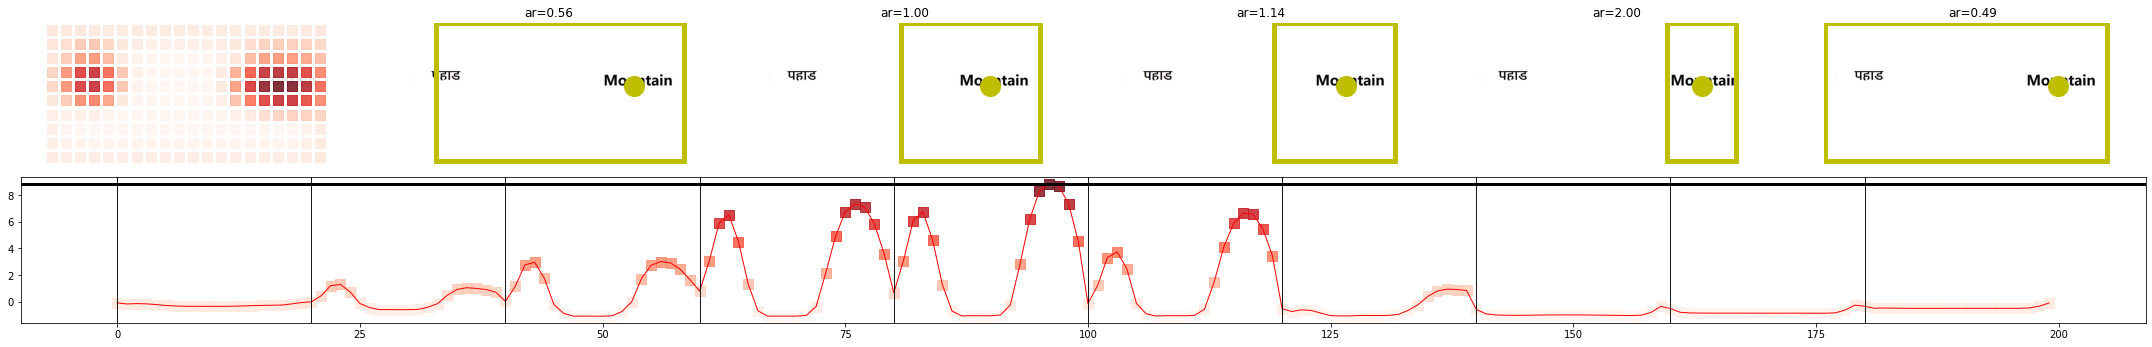

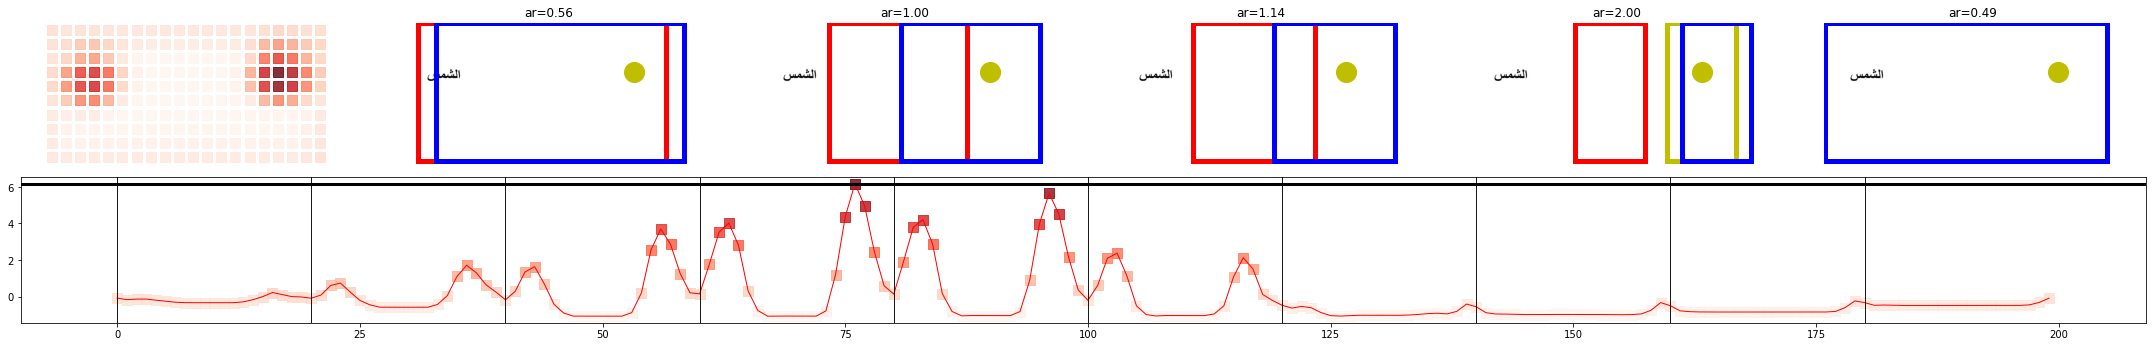

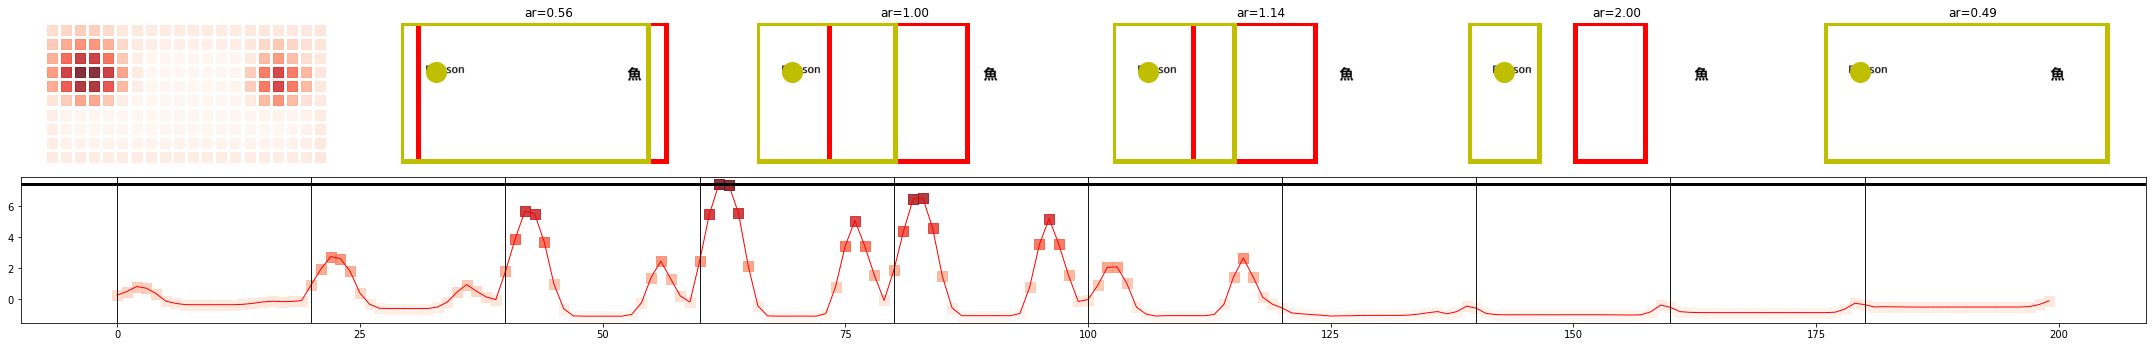

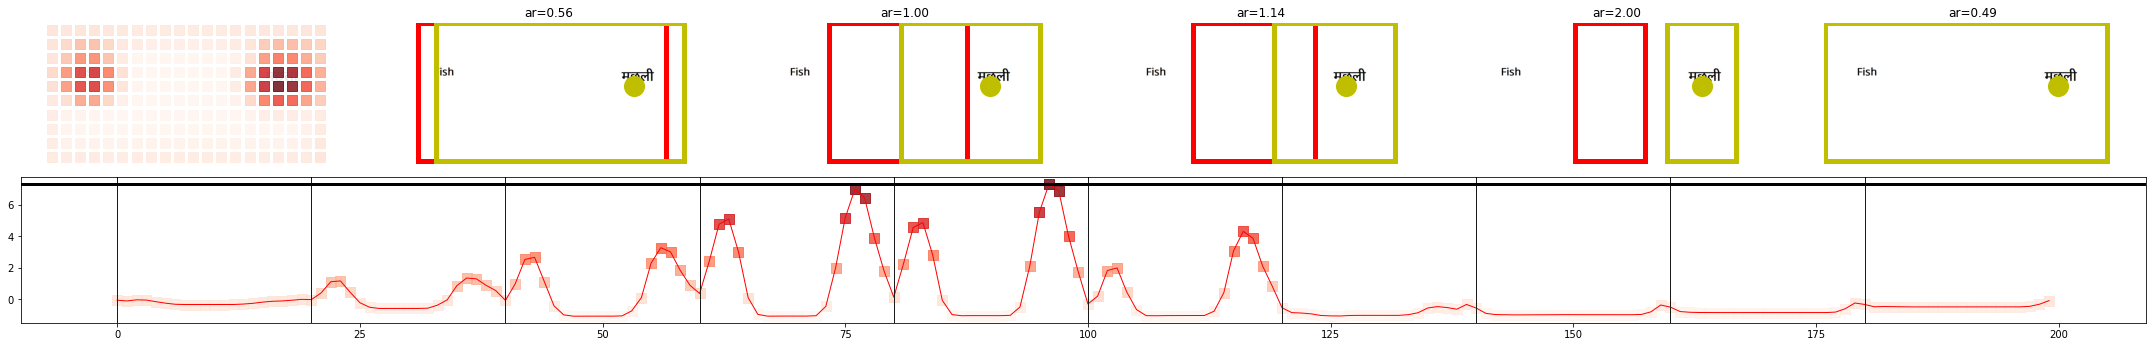

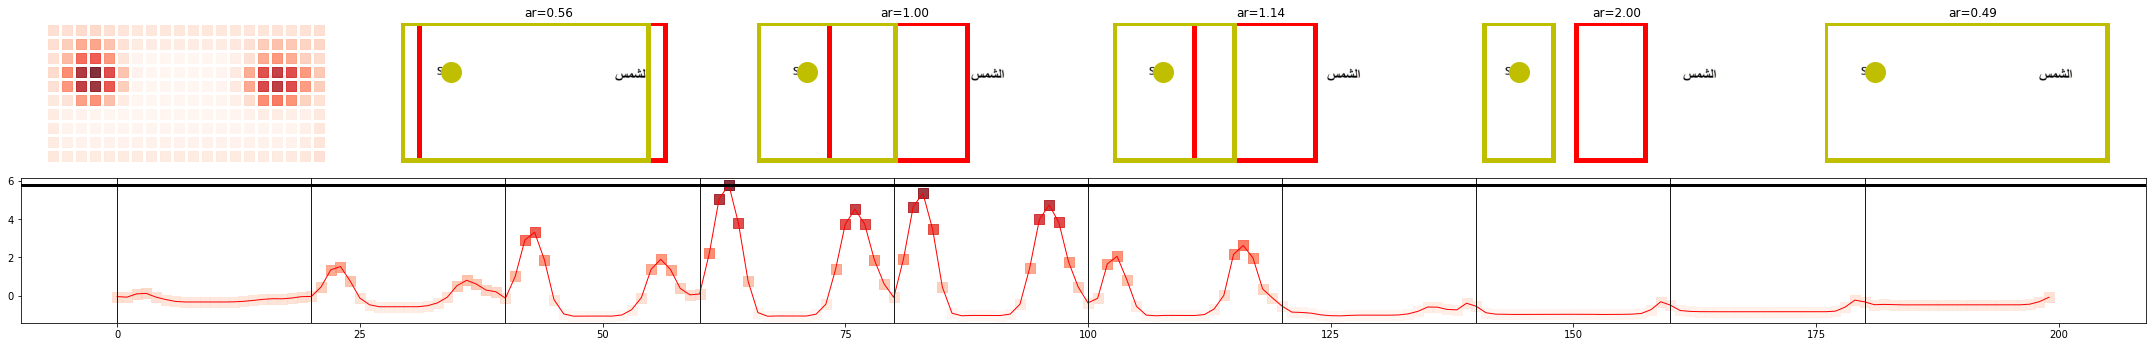

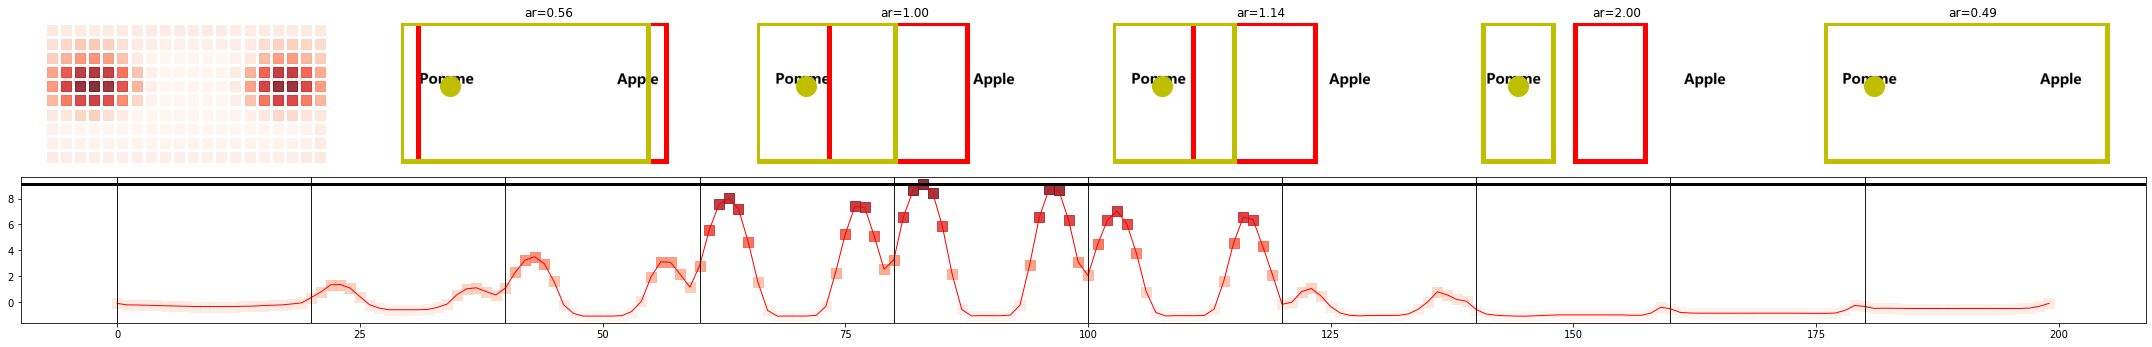

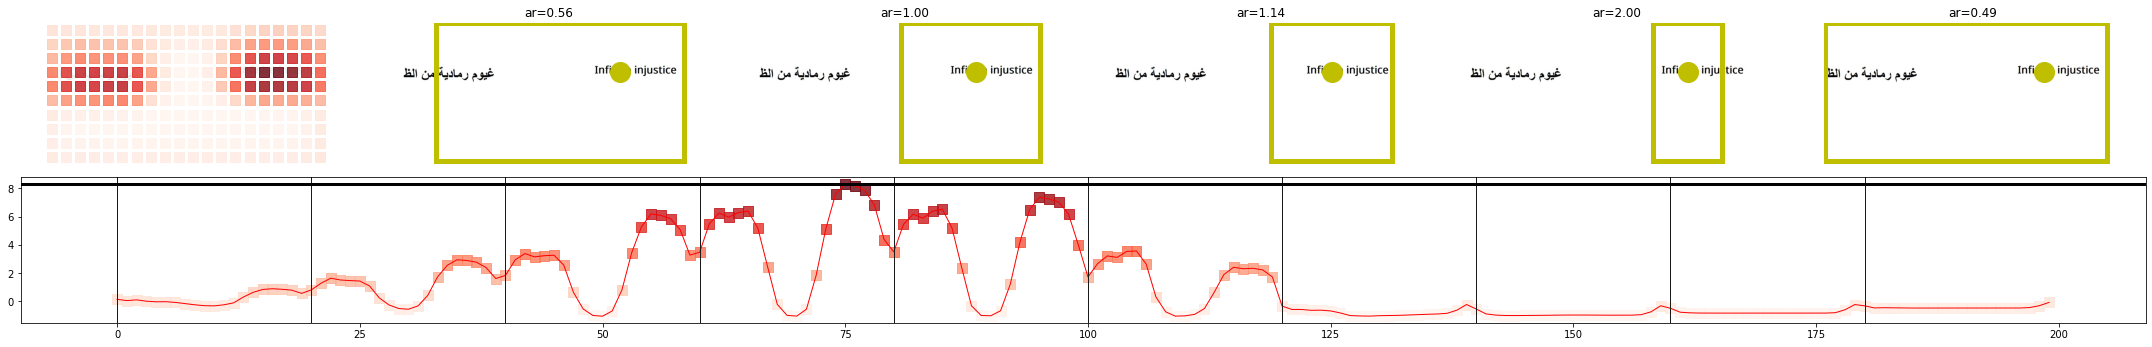

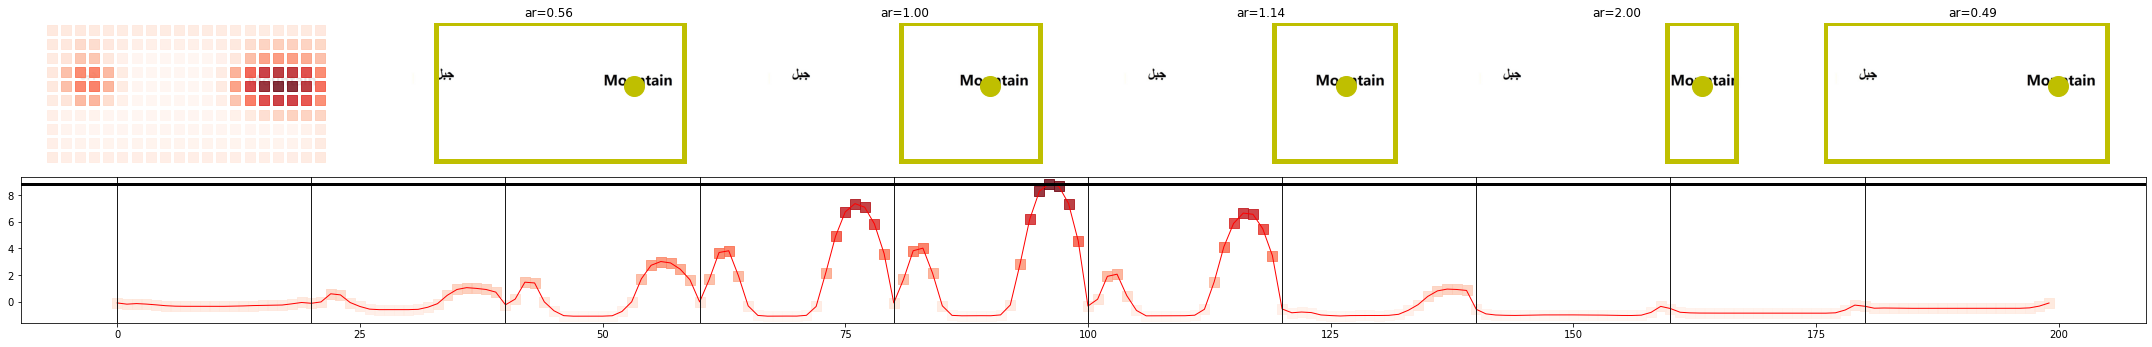

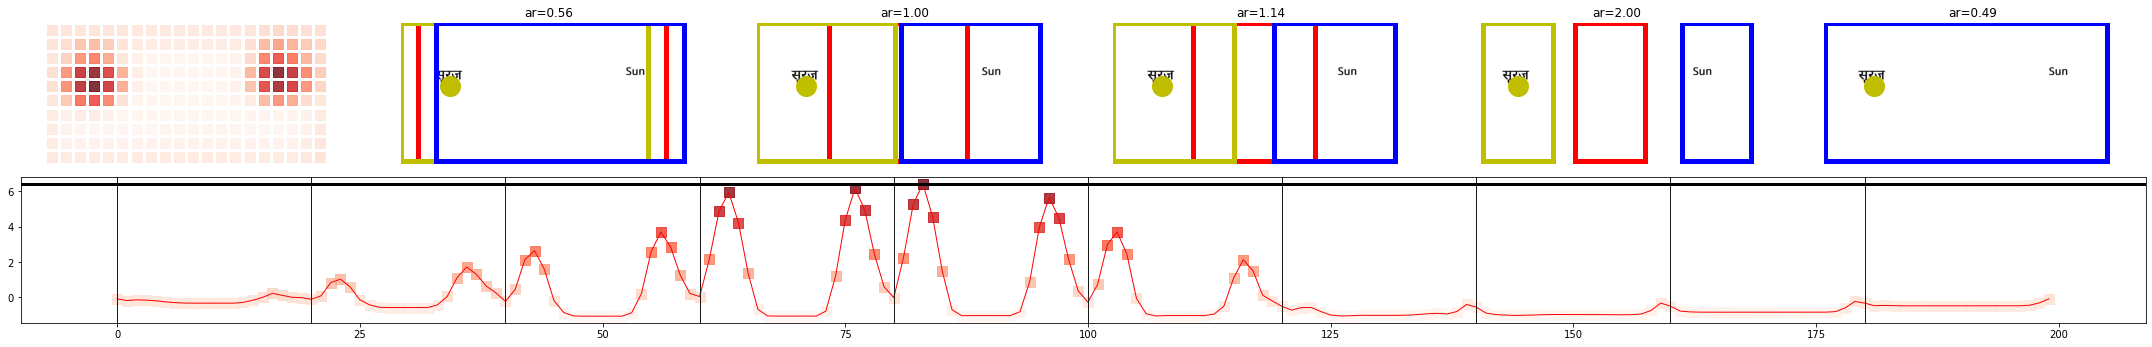

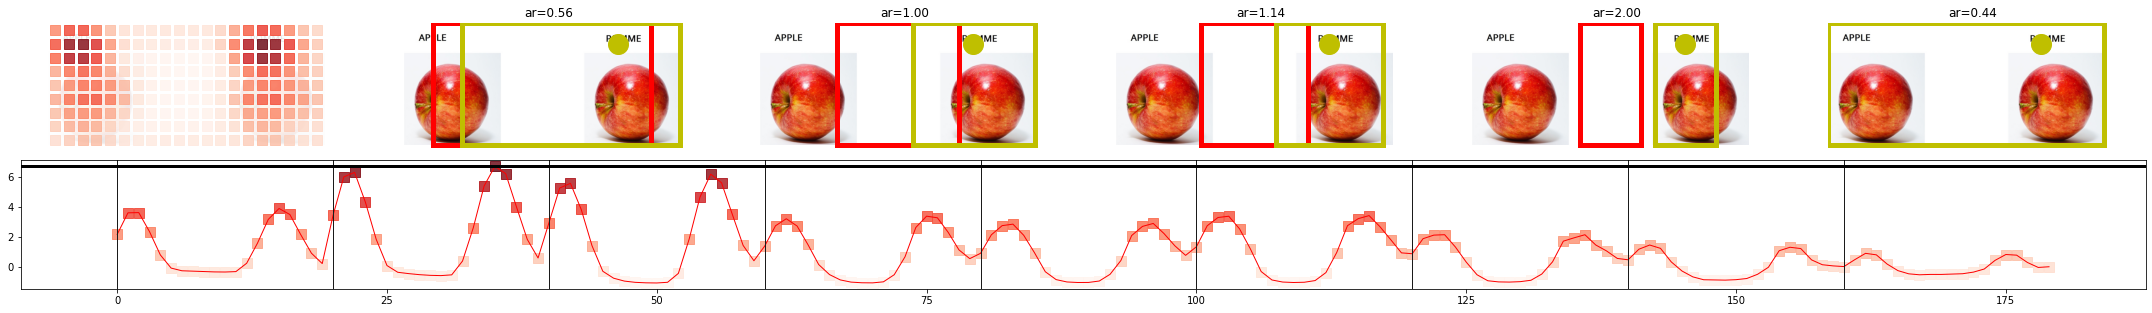

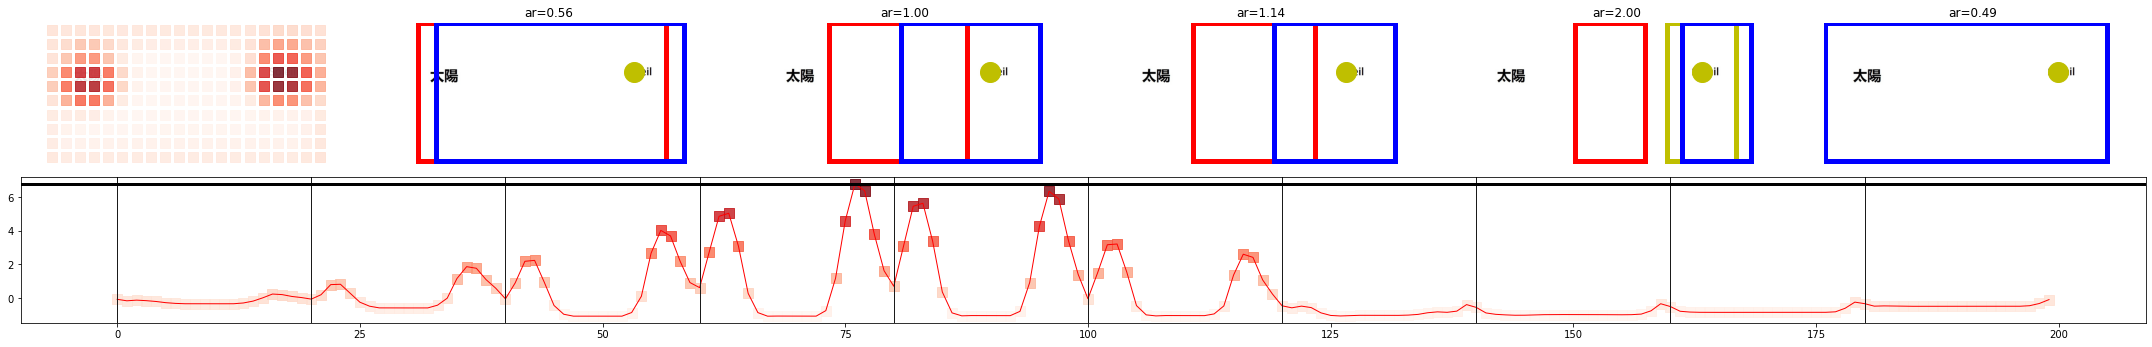

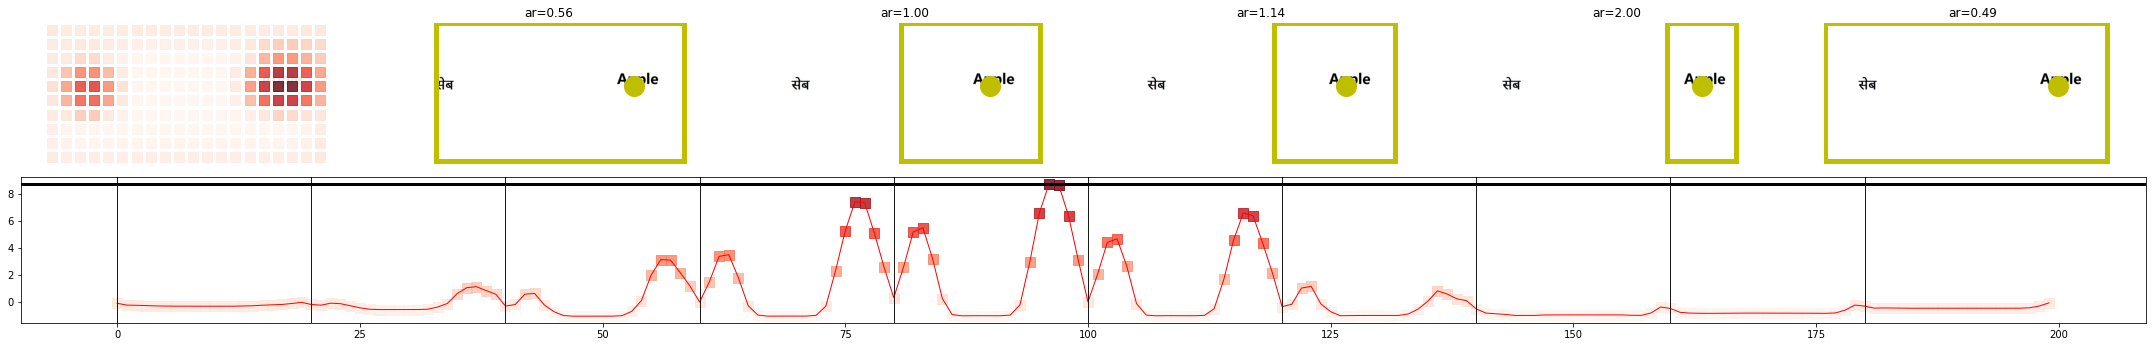

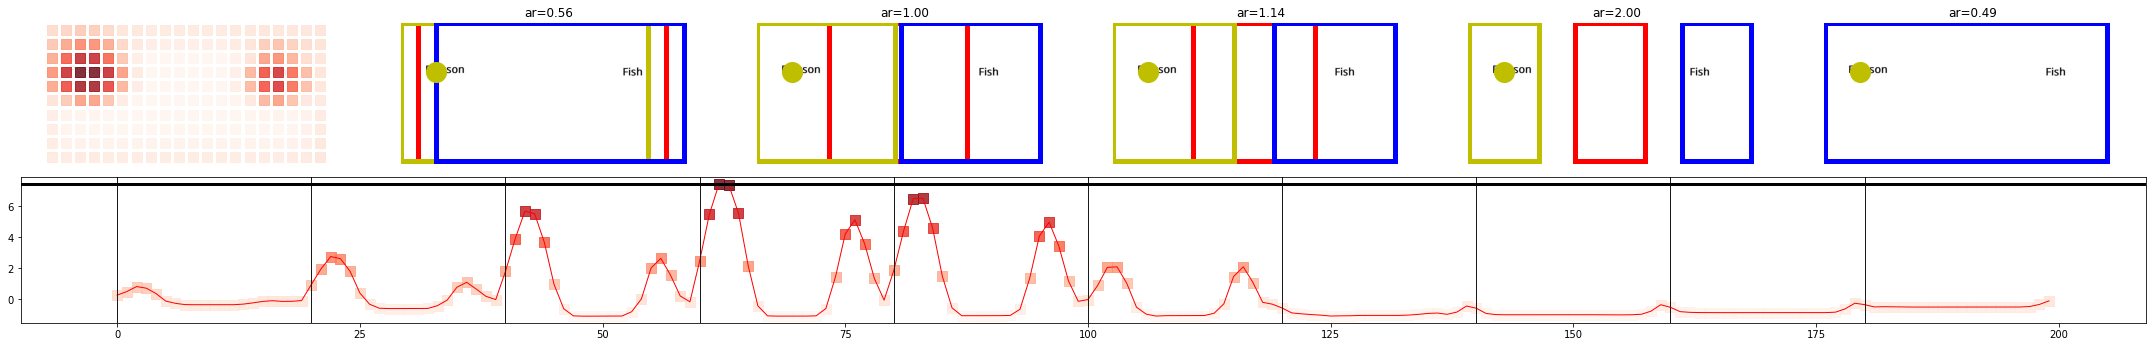

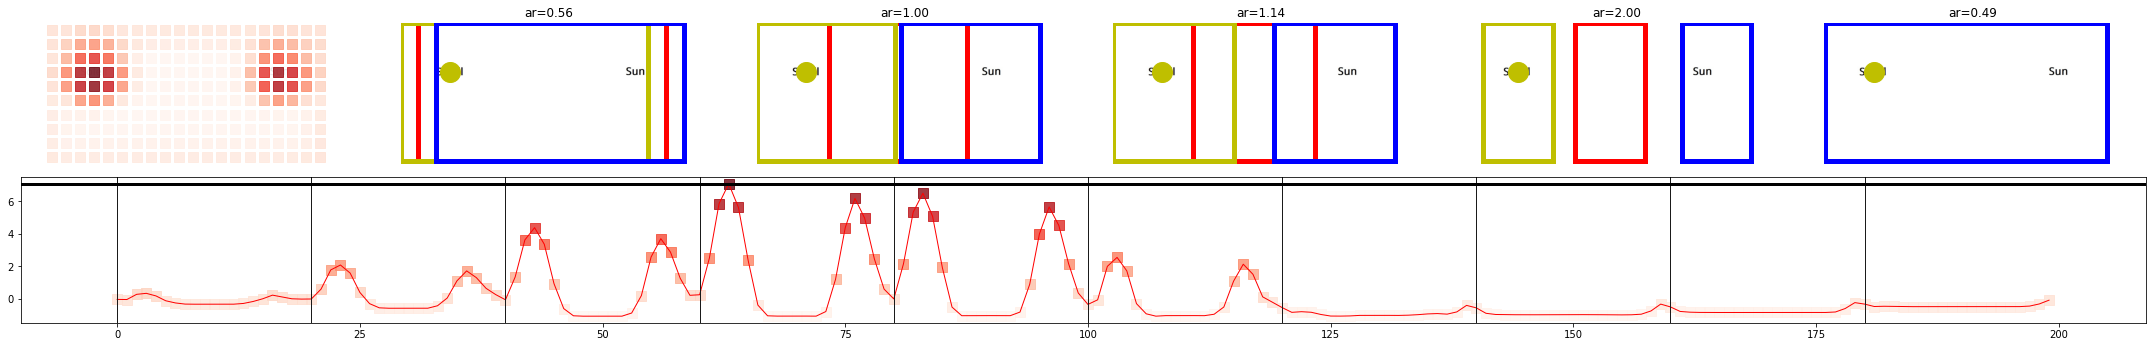

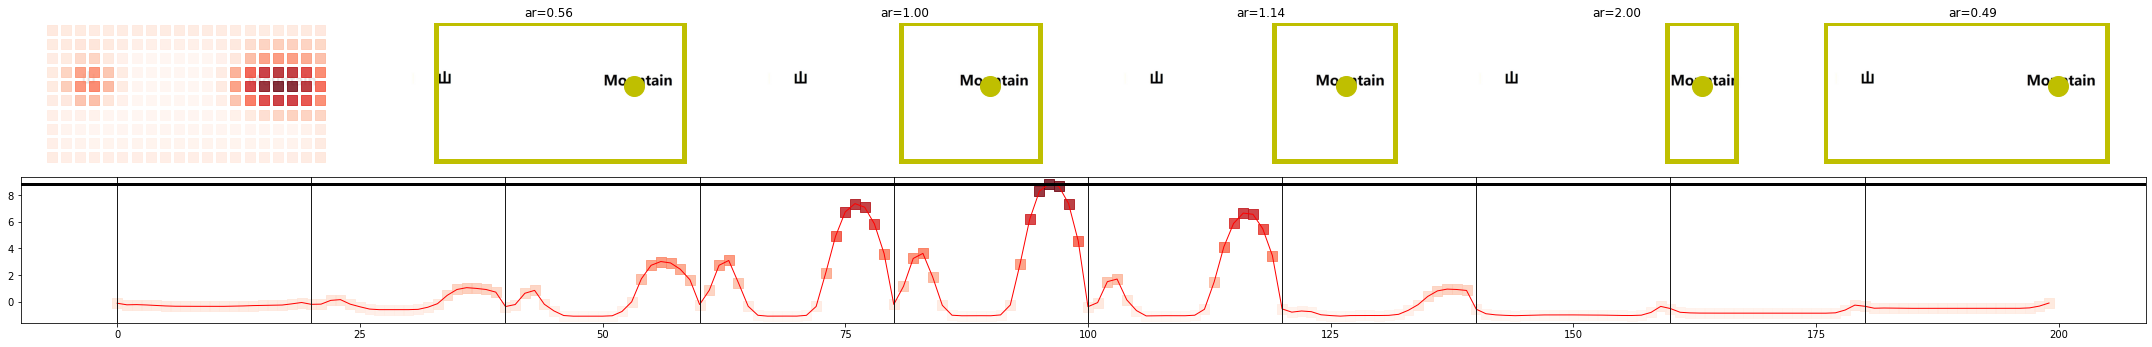

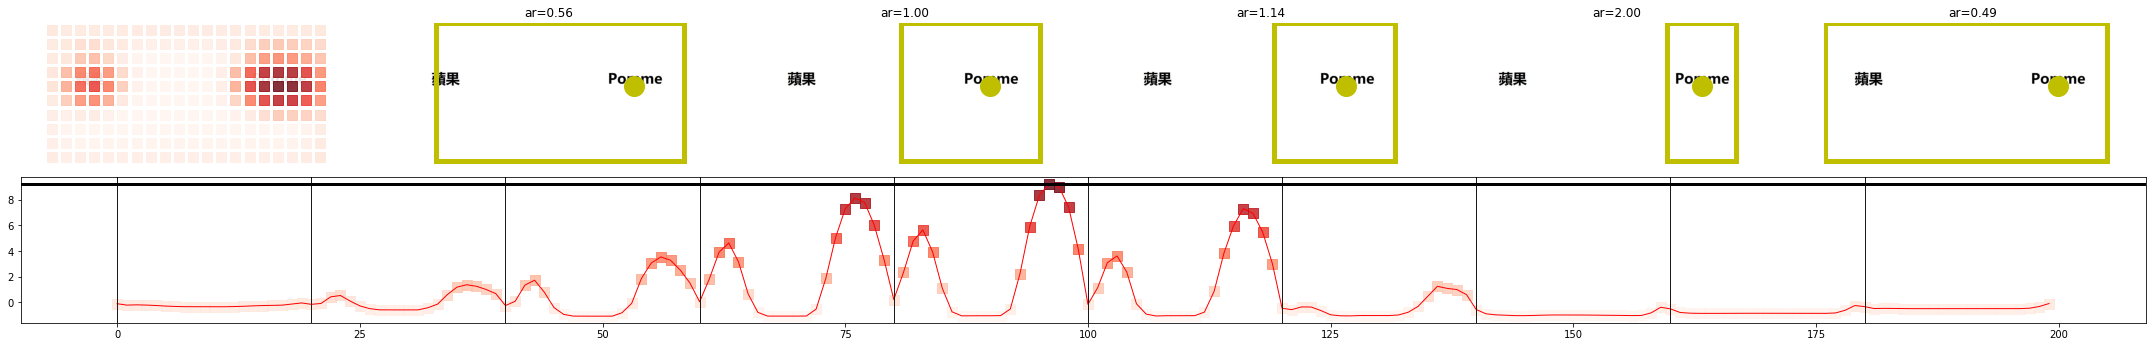

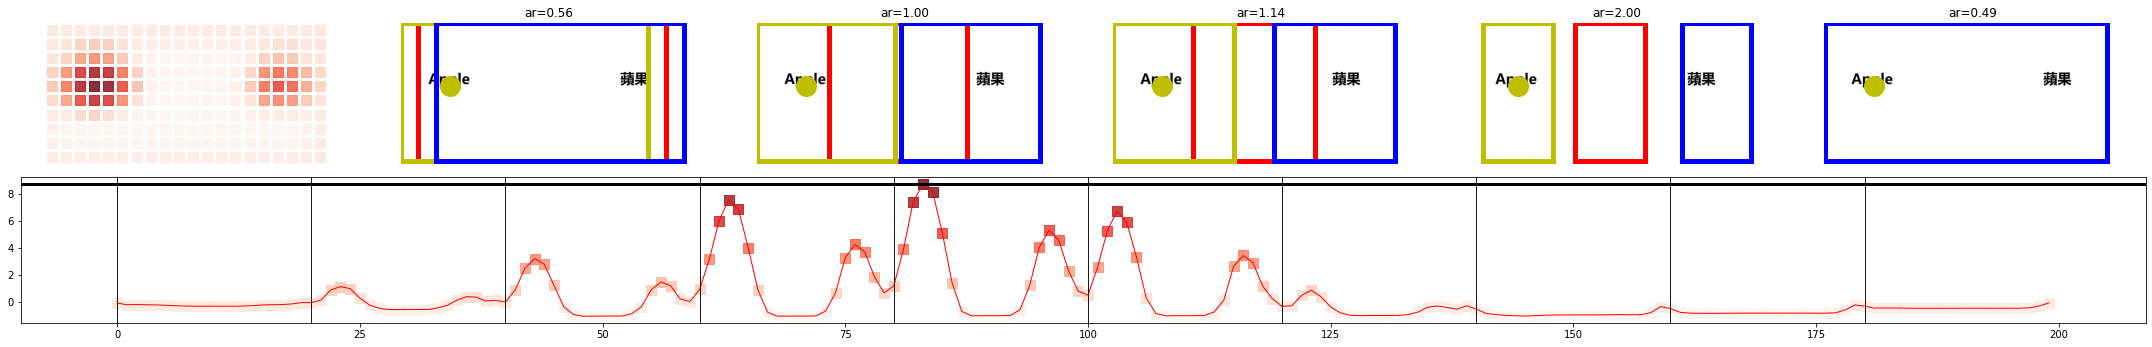

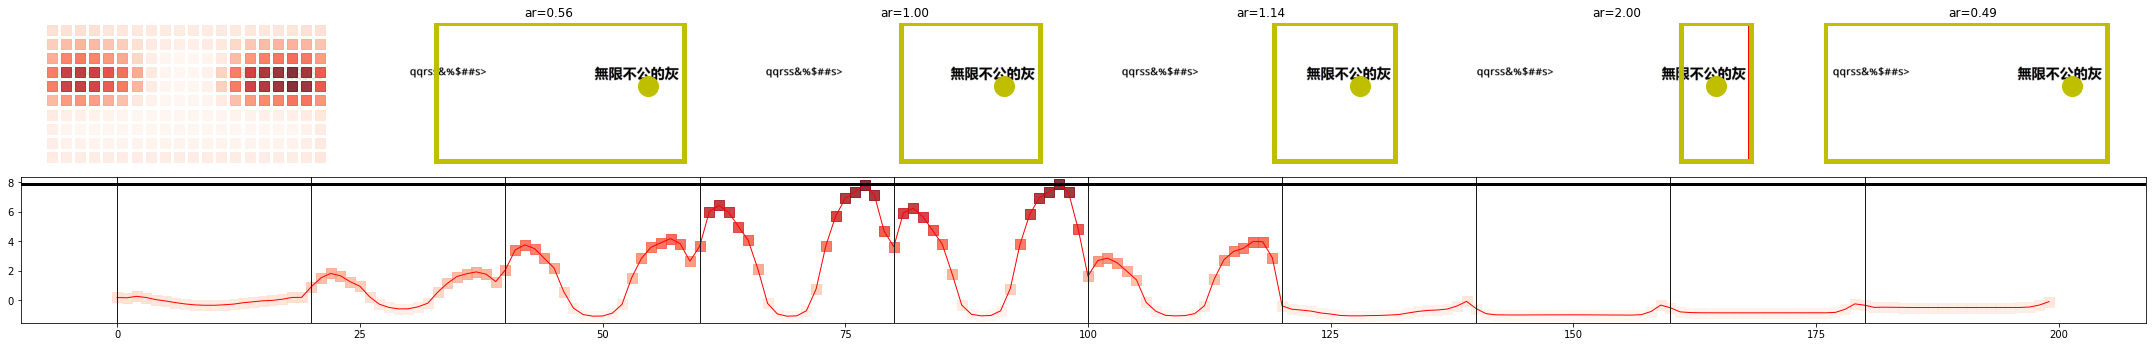

In [24]:
for img_path in data_dir.glob("Generated/*.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)